### Load Data

**Importing necessary librarie**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter(action='ignore')
%matplotlib inline

**Load the Data & Taking a look at the dataset**

In [3]:
# Reading the dataset and converting it into a dataframe
df = pd.read_csv(r'C:\Users\cragh\Desktop\CapstoneProject\CreditCardFraudDetection-2\creditcard.csv')

In [4]:
# Taking a look at the first 5 rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Taking a look at the last 5 rows of the dataset
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### EXPLORATORY DATA ANALYSIS (EDA)

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [17]:
df.shape

(284807, 31)

**Dataset overview**
+ Dataset consists of 284807 lines and 31 columns.
+ There are no null values in the data.

In [7]:
# Checking for null values
df.isnull().sum().max()

0

In [18]:
# Checking the number of missing values in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
# Descriptive analysis
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Checking Duplicate values and Outlier values

In [10]:
# Checking for any duplicate rows
df.duplicated(keep=False).sum()

1854

In [11]:
# Find duplicate rows, considering all columns, marking all duplicates as True
duplicates_all = df.duplicated(keep=False)

In [12]:
df_duplicated = df[duplicates_all]
df_duplicated

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284192,172233.0,-2.691642,3.123168,-3.339407,1.017018,-0.293095,-0.167054,-0.745886,2.325616,-1.634651,...,0.402639,0.259746,-0.086606,-0.097597,0.083693,-0.453584,-1.205466,-0.213020,36.74,0


In [19]:

# Remove duplicate rows but keep the first occurrence of each duplicate
df_unique = df.drop_duplicates(keep='first')

print("Original row count:", len(df))
print("Row count after removing duplicates:", len(df_unique))

Original row count: 284807
Row count after removing duplicates: 283726


The data removed duplicate records

### Data Visualization

In [21]:
df_unique["Class"].describe()

count    283726.000000
mean          0.001667
std           0.040796
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

Class
0    283253
1       473
Name: count, dtype: int64


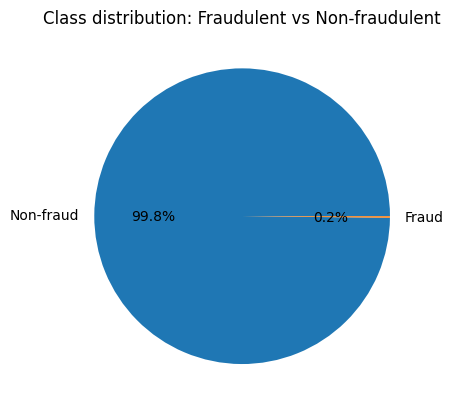

In [24]:
# Creating pie chart to visualize class distribution
plt.pie([(df_unique['Class']==0).sum() , (df_unique['Class']==1).sum()], labels=('Non-fraud' , 'Fraud'), autopct='%1.1f%%')
plt.title('Class distribution: Fraudulent vs Non-fraudulent')

print(df_unique.Class.value_counts())

Data is Highly Imbalanced.

In [26]:
# Time statistical summary across fraudulent and non-fraudulent transactions.
print ("Fraudulent")
print (df_unique.Time[df_unique.Class == 1].describe())
print ()
print ("Non-Fraudulent")
print (df_unique.Time[df_unique.Class == 0].describe())

Fraudulent
count       473.000000
mean      80450.513742
std       48636.179973
min         406.000000
25%       41203.000000
50%       73408.000000
75%      129095.000000
max      170348.000000
Name: Time, dtype: float64

Non-Fraudulent
count    283253.000000
mean      94835.058093
std       47475.550607
min           0.000000
25%       54233.000000
50%       84711.000000
75%      139308.000000
max      172792.000000
Name: Time, dtype: float64


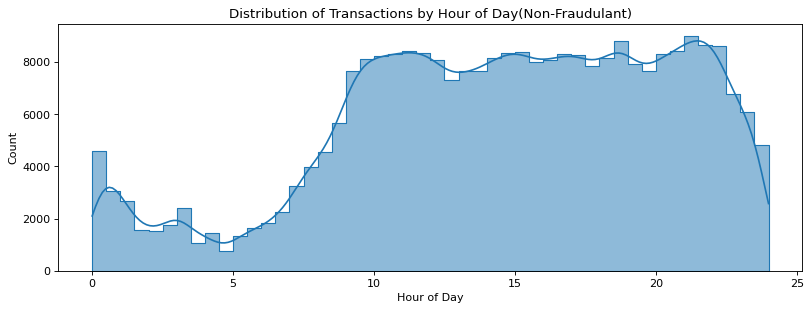

In [18]:
#Count of non fraudulant transaction over hours 
df_unique['Time_hours'] = df_unique['Time'] / 3600  # Convert time to hours for easier analysis
df_unique['Time_hours'] = df_unique['Time_hours'] % 24  # Convert to hours in a day

plt.figure(figsize=(12, 4), dpi=80)
sns.histplot(data=df_unique, x='Time_hours', bins=48, kde=True, element='step')
plt.title('Distribution of Transactions by Hour of Day(Non-Fraudulant)')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()


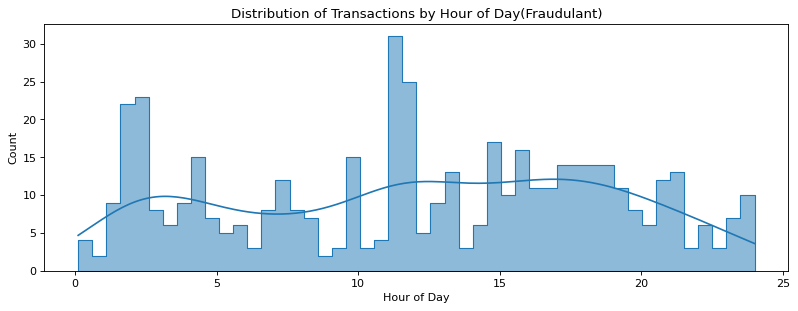

In [19]:
#Count of fraudulant transaction over hours
df_copy_fraud=df_unique[df_unique['Class']==1]
df_copy_fraud['Time_hours'] = df_copy_fraud['Time'] / 3600  # Convert time to hours for easier analysis
df_copy_fraud['Time_hours'] = df_copy_fraud['Time_hours'] % 24  # Convert to hours in a day

plt.figure(figsize=(12, 4), dpi=80)
sns.histplot(data=df_copy_fraud, x='Time_hours', bins=48, kde=True, element='step')
plt.title('Distribution of Transactions by Hour of Day(Fraudulant)')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

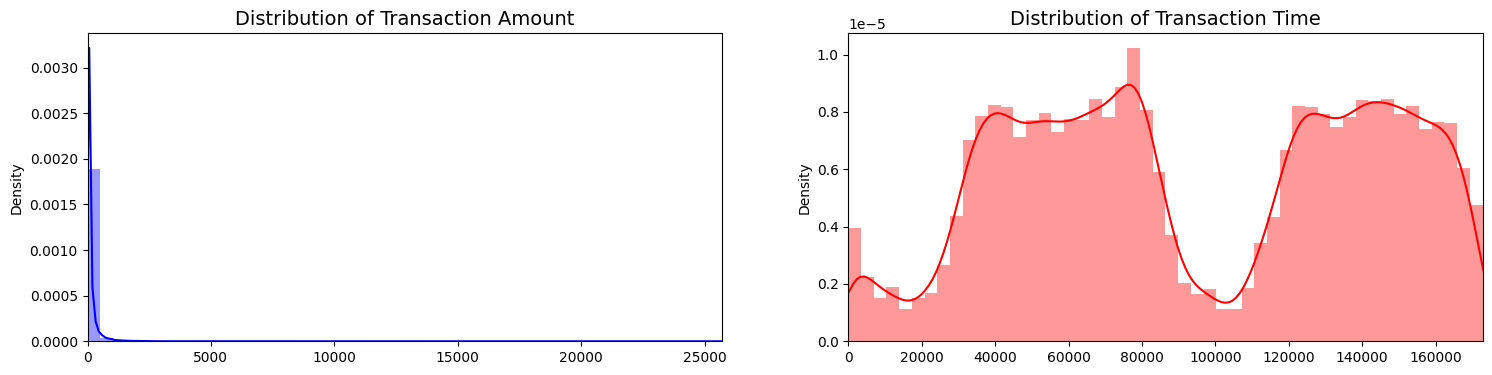

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df_unique['Amount'].values
time_val = df_unique['Time'].values

sns.distplot(amount_val, ax=ax[0], color='b')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='r')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show();

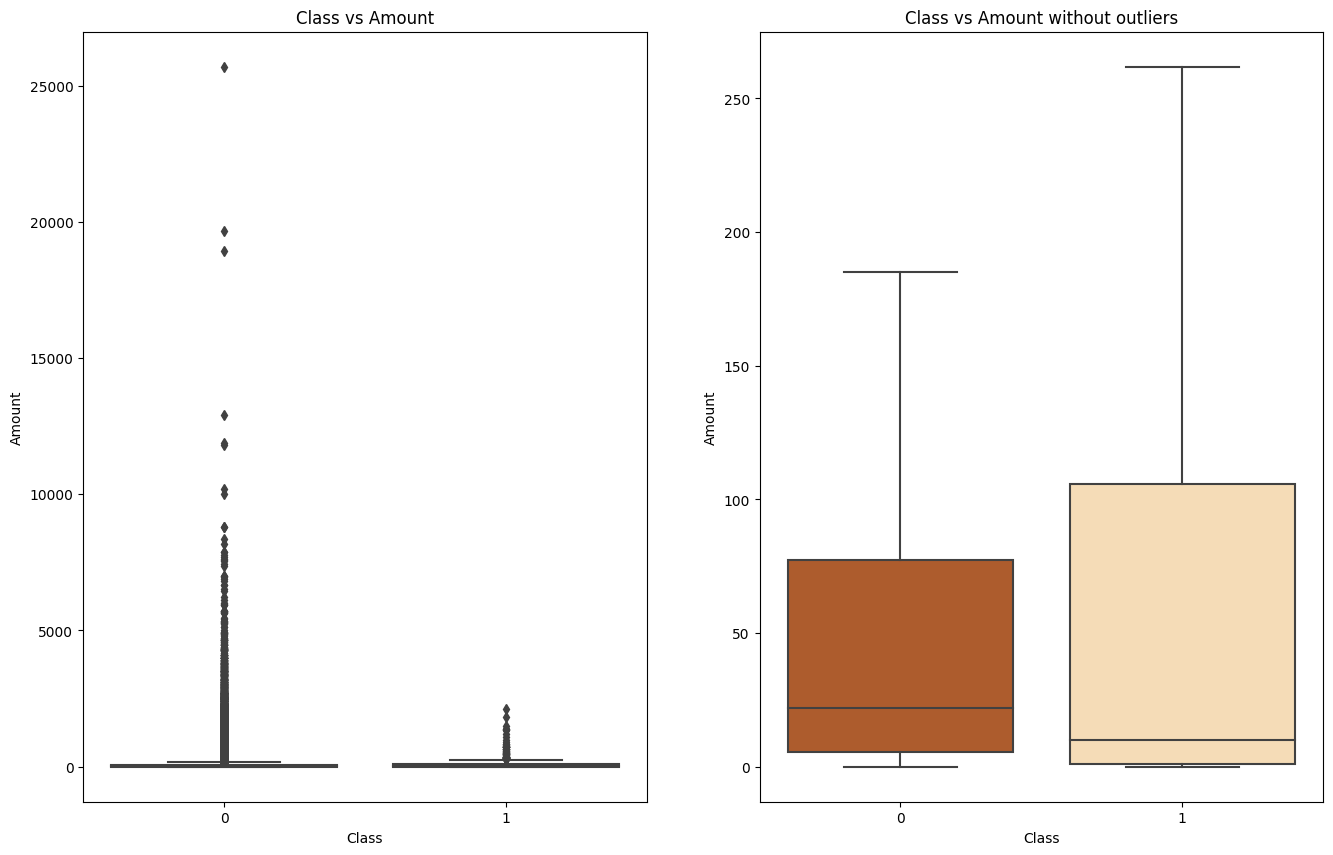

In [30]:


fig, axes = plt.subplots(ncols=2, figsize=(16,10))
colors = ['#C35617', '#FFDEAD']

sns.boxplot(x="Class", y="Amount", data=df_unique, palette = colors, ax=axes[0], showfliers=True)
axes[0].set_title('Class vs Amount')

sns.boxplot(x="Class", y="Amount", data=df_unique, palette = colors, ax=axes[1], showfliers=False)
axes[1].set_title('Class vs Amount without outliers')

plt.show();

**Observation:** 
+ The range of 'Amount' values of data is very different, implementing machine learning algorithms without scaling will result in Machine Learning goals that will not work properly without normalization.
+ Non-Fraud transactions have large average values, large 'Q1', 'Q3' and 'Q4' are smaller and larger than exceptions.
+ Fraudulent transactions have a smaller 'Q1' and a larger average 'Q4' and smaller exceptions.

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

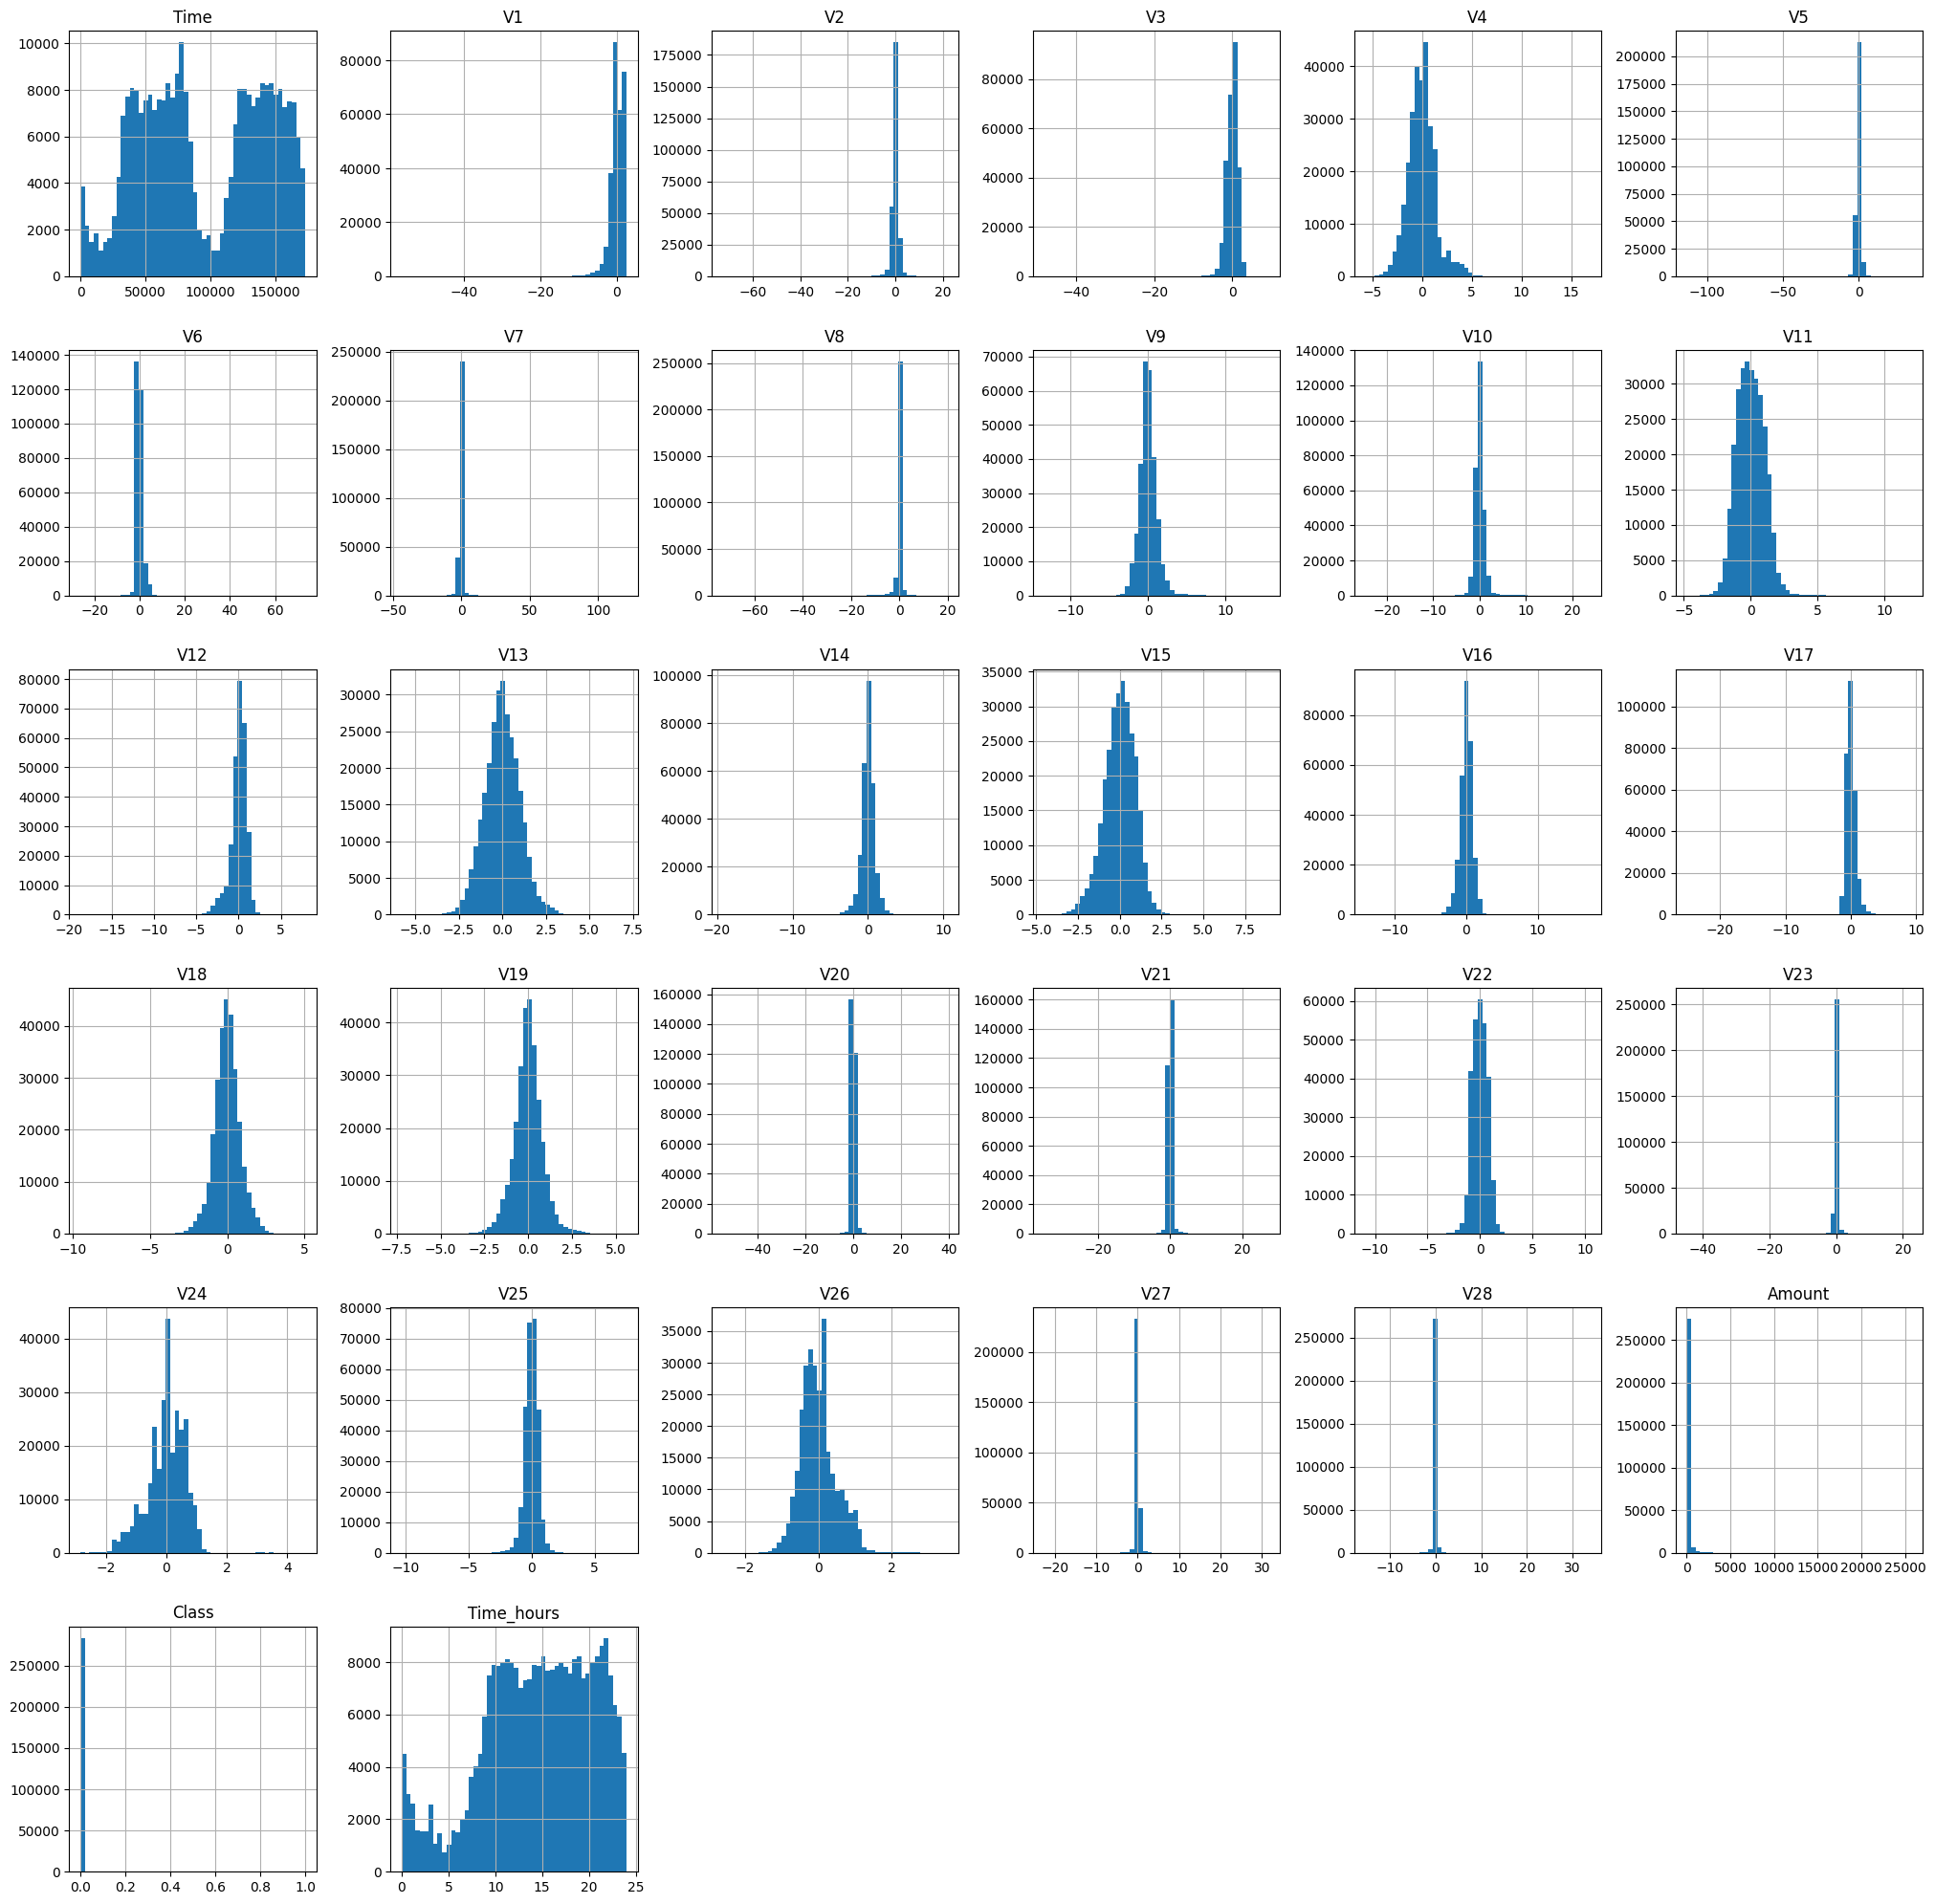

In [20]:
# Creating histograms for numerical columns to visualize data distribution
df_unique.hist(bins=50, figsize=(25,25) , grid = True)

It can be seen that all the features except time and amount are shaped normal. This means time and amount need to be scaled.

Text(0.5, 1.0, 'Non Fraud')

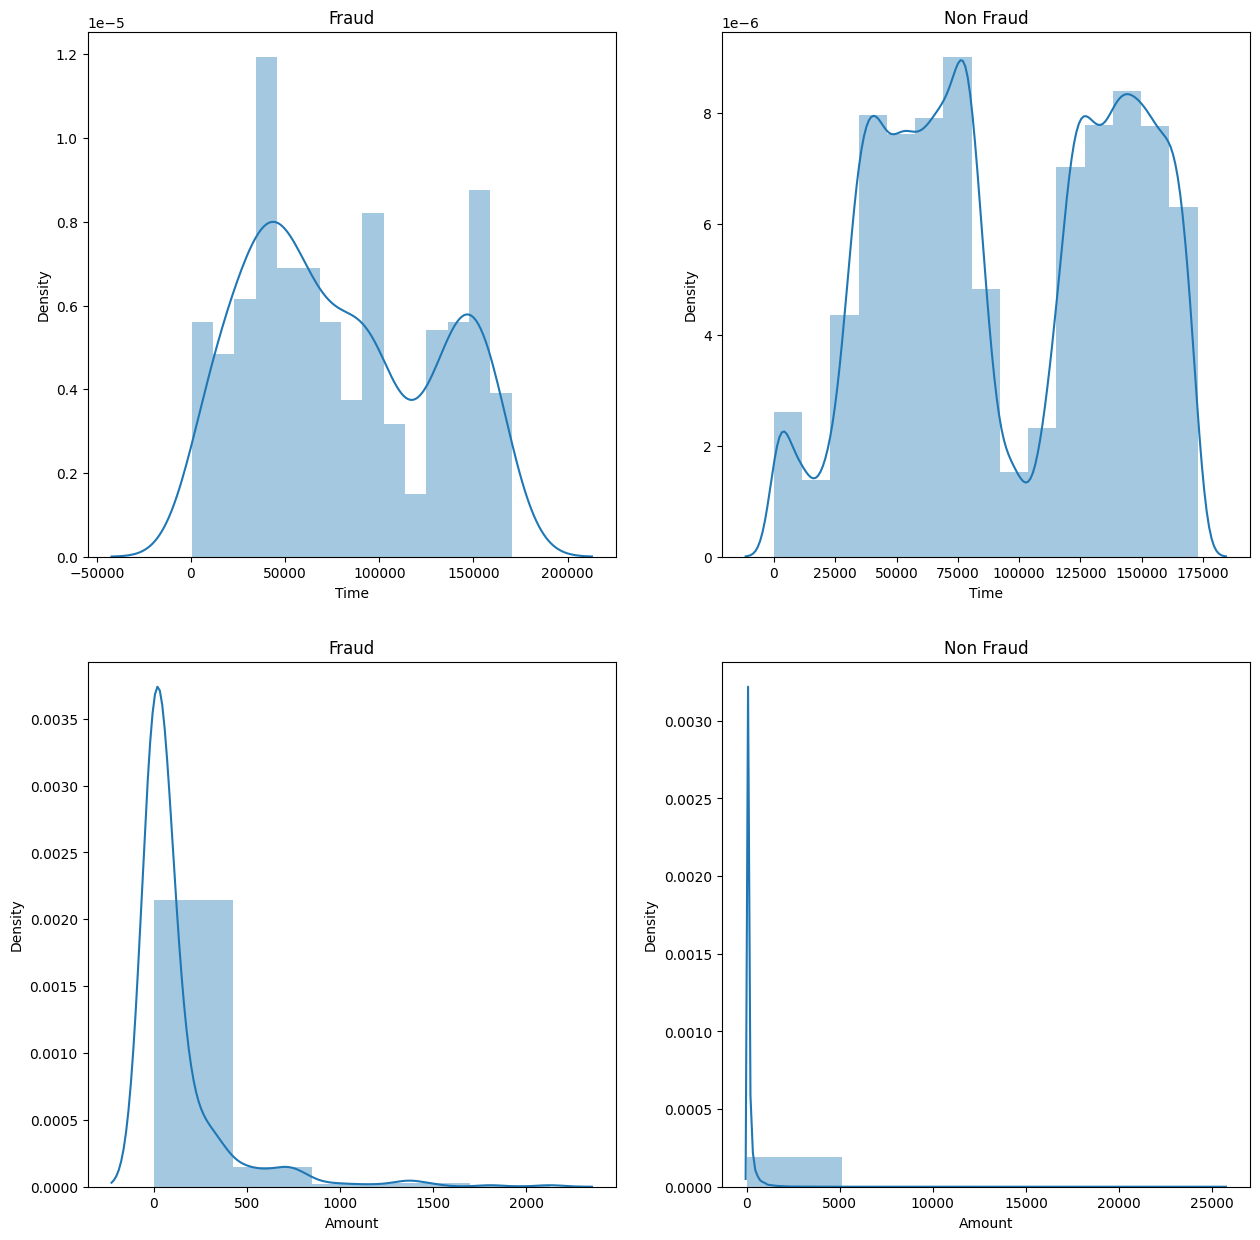

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))
sns.distplot(df_unique['Time'][df_unique['Class'] == 1], bins=15, ax=ax1)
sns.distplot(df_unique['Time'][df_unique['Class'] == 0], bins=15, ax=ax2)

sns.distplot(df_unique['Amount'][df_unique['Class'] == 1], bins=5, ax=ax3)
sns.distplot(df_unique['Amount'][df_unique['Class'] == 0], bins=5, ax=ax4)

ax1.set_title('Fraud')
ax2.set_title('Non Fraud')
ax3.set_title('Fraud')
ax4.set_title('Non Fraud')


In [54]:
correlation_matrix = df_unique.corr()

# Print the correlation matrix
print(correlation_matrix)

            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.118383 -0.010613 -0.423365 -0.106030  0.176797 -0.064128   
V1      0.118383  1.000000 -0.004254 -0.014313  0.006129 -0.017628  0.006363   
V2     -0.010613 -0.004254  1.000000 -0.004724  0.005564 -0.009361  0.007170   
V3     -0.423365 -0.014313 -0.004724  1.000000  0.006591 -0.021716  0.007379   
V4     -0.106030  0.006129  0.005564  0.006591  1.000000  0.008020 -0.004417   
V5      0.176797 -0.017628 -0.009361 -0.021716  0.008020  1.000000  0.020896   
V6     -0.064128  0.006363  0.007170  0.007379 -0.004417  0.020896  1.000000   
V7      0.086754  0.003677  0.026770  0.005960 -0.003138  0.032641 -0.025805   
V8     -0.038091 -0.004253 -0.001386 -0.005992  0.002708 -0.008058  0.009071   
V9     -0.007812  0.001220 -0.001357 -0.004388  0.002555 -0.002991  0.000331   
V10     0.031181 -0.002104 -0.004485 -0.012883  0.004581 -0.012310  0.001422   
V11    -0.248596  0.001733  0.000355  0.

<Axes: >

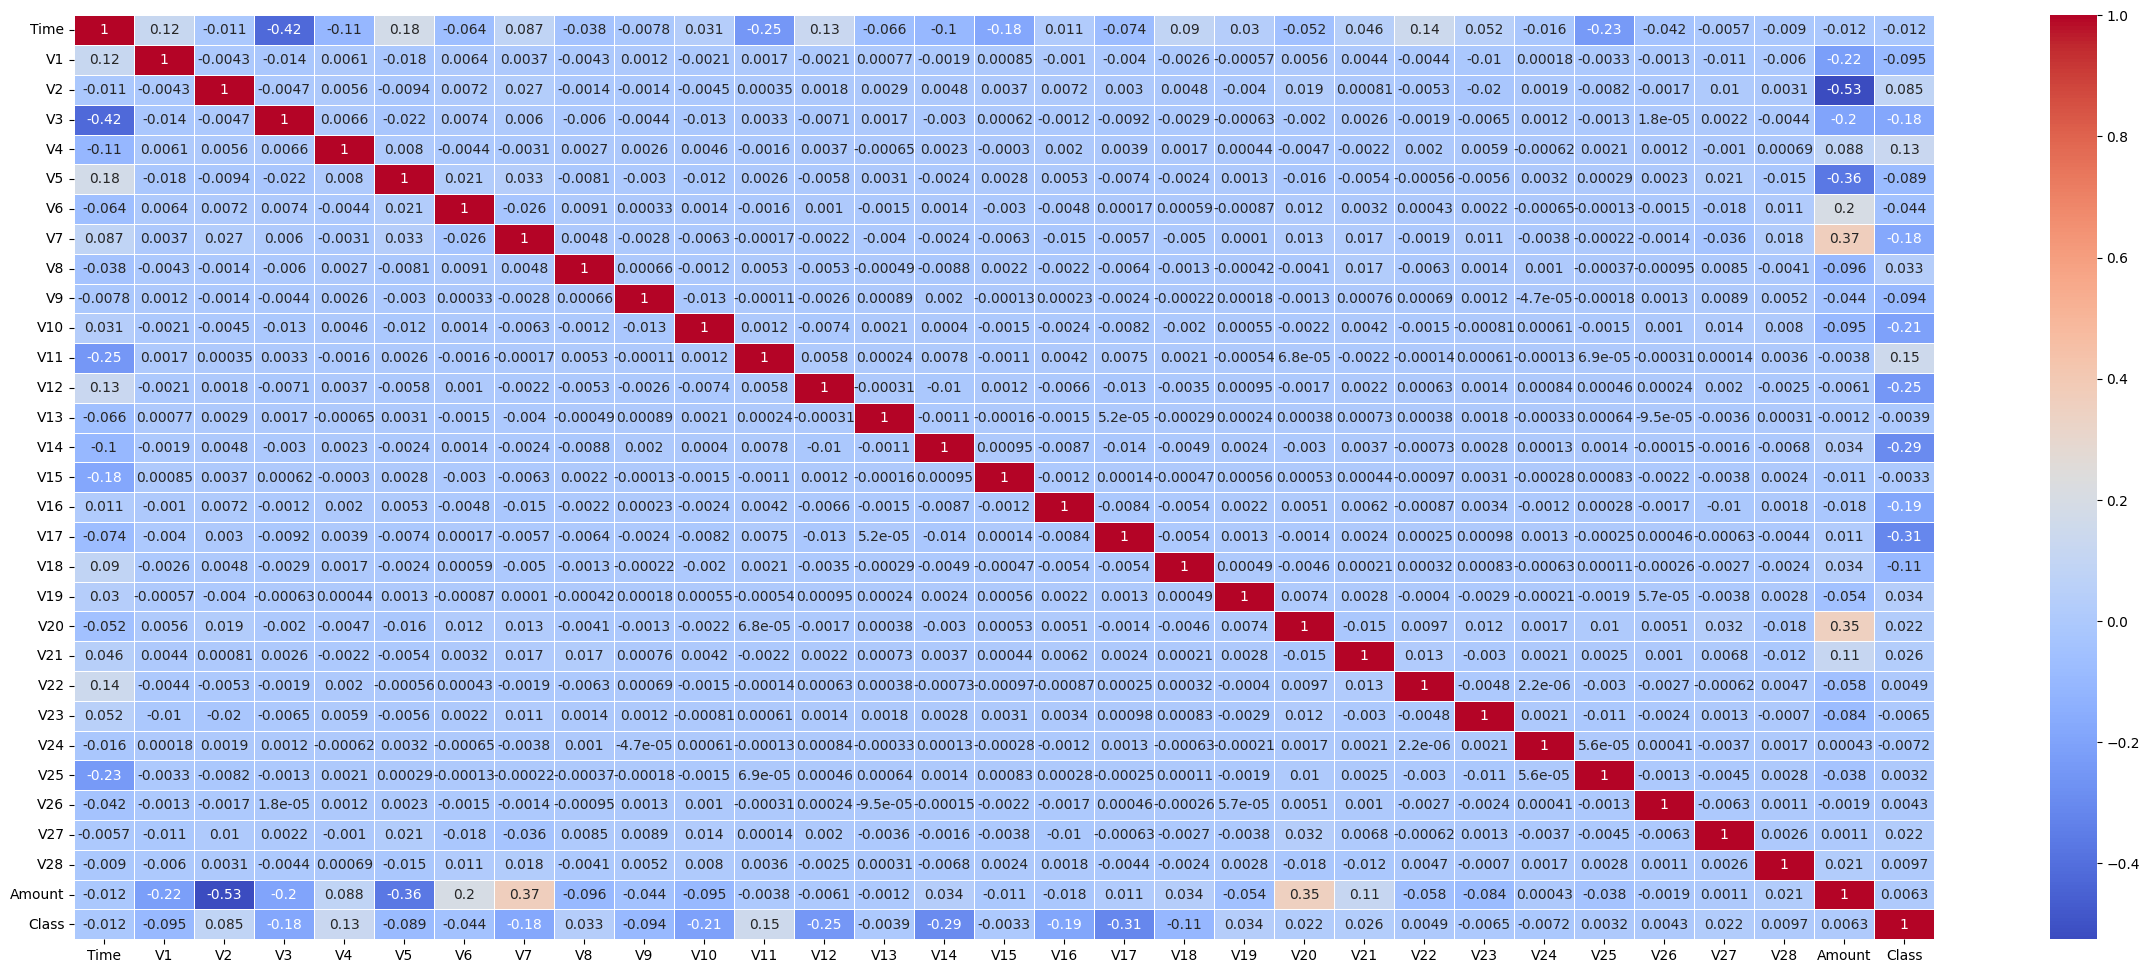

In [56]:

# Assuming your correlation matrix is stored in 'correlation_matrix'
plt.figure(figsize=(30, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)


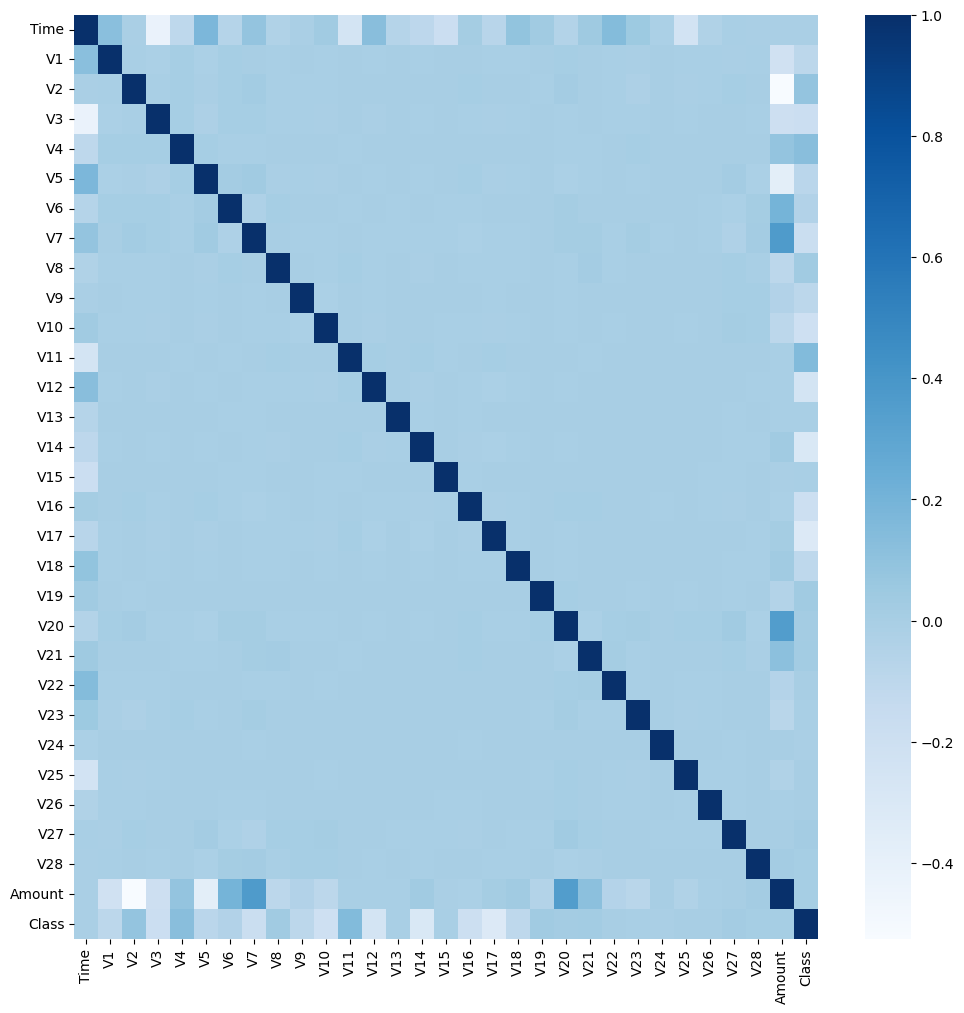

In [58]:
fig=plt.figure(figsize= (12, 12)) 
sns.heatmap(df_unique.corr(), cmap='Blues')
plt.show()


**Observation:** There is no noticeable correlation between V1~V28 features. There is certain correlation between some of these features with 'Time' (which correlates inversely with V3) and 'Amount' (which directly correlates with V7 and V20, which negatively correlates with V1, V2 and V5).

In [59]:
from scipy.stats import iqr
upper_limit =df_unique['Amount'].quantile(0.75)+(1.5*iqr(df_unique['Amount']))
print(upper_limit)
print(df_unique[df_unique['Amount']>upper_limit]['Class'].value_counts())


185.35000000000002
Class
0    31589
1       87
Name: count, dtype: int64


In [60]:
df_unique = df_unique[df_unique['Amount']<=8000]
print(df_unique['Class'].value_counts())
print('\nPercentage of Fraudulant activity:{:.2%}'.format((df_unique[df_unique['Class']==1].shape[0]/df_unique.shape[0])))

Class
0    283241
1       473
Name: count, dtype: int64

Percentage of Fraudulant activity:0.17%


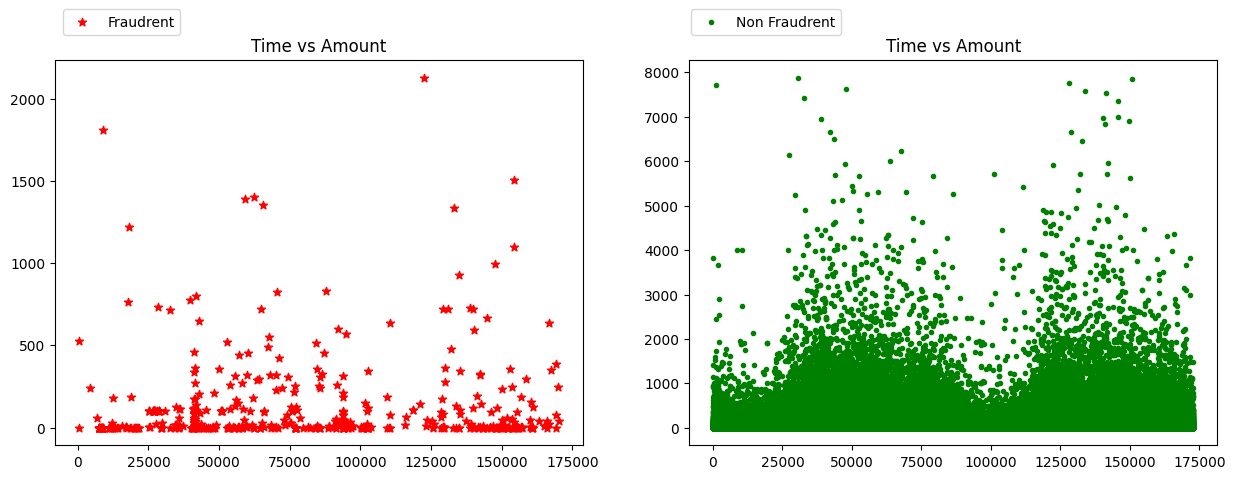

In [61]:
# plotting relation with different scale
class1 = df_unique[df_unique['Class']==1]
class0 = df_unique[df_unique['Class']==0]
fig, ax = plt.subplots(1,2, figsize=(15, 5))

ax[0].scatter(class1['Time'], class1['Amount'], color='red', marker= '*', label='Fraudrent')
ax[0].set_title('Time vs Amount')
ax[0].legend(bbox_to_anchor =(0.25, 1.15))

ax[1].scatter(class0['Time'], class0['Amount'], color='green', marker= '.', label='Non Fraudrent')
ax[1].set_title('Time vs Amount')
ax[1].legend(bbox_to_anchor =(0.3, 1.15))

plt.show();

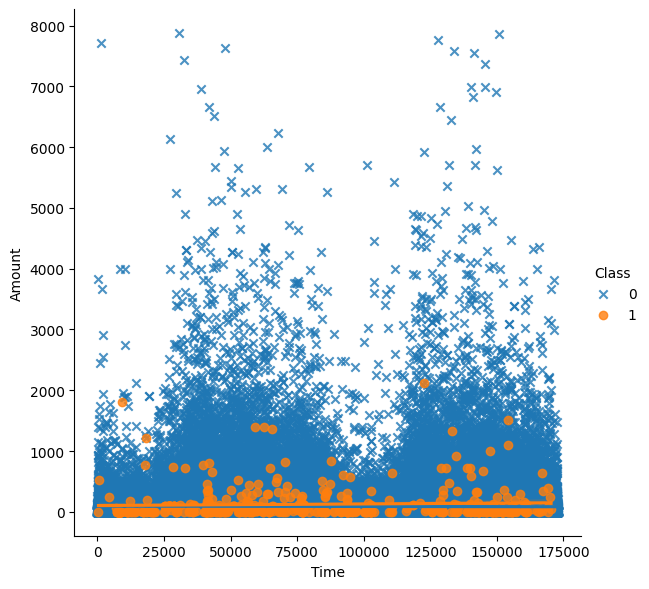

In [45]:
sns.lmplot(x='Time', y='Amount', hue='Class', markers=['x', 'o'], data=df_unique, height=6);

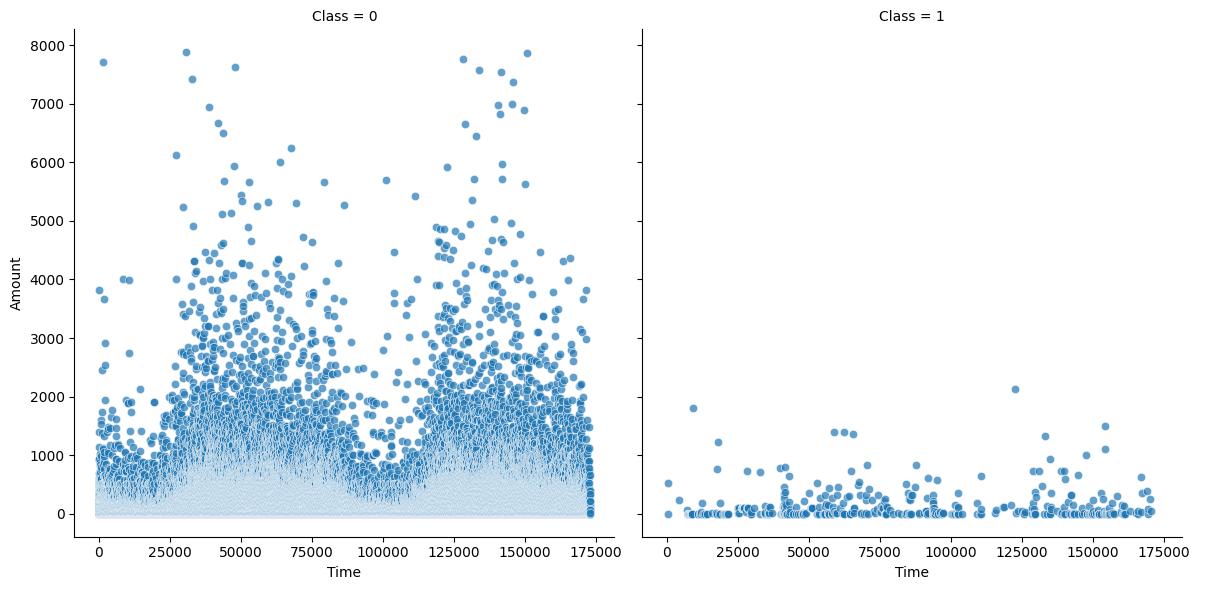

In [46]:
# plot relation in same scale
samescale = sns.FacetGrid(df_unique, col="Class", height=6)
samescale.map(sns.scatterplot, "Time", "Amount", alpha=.7)
samescale.add_legend();

In [64]:
# Creating fraudulent dataframe
data_fraud = df_unique[df_unique['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df_unique[df_unique['Class'] == 0]

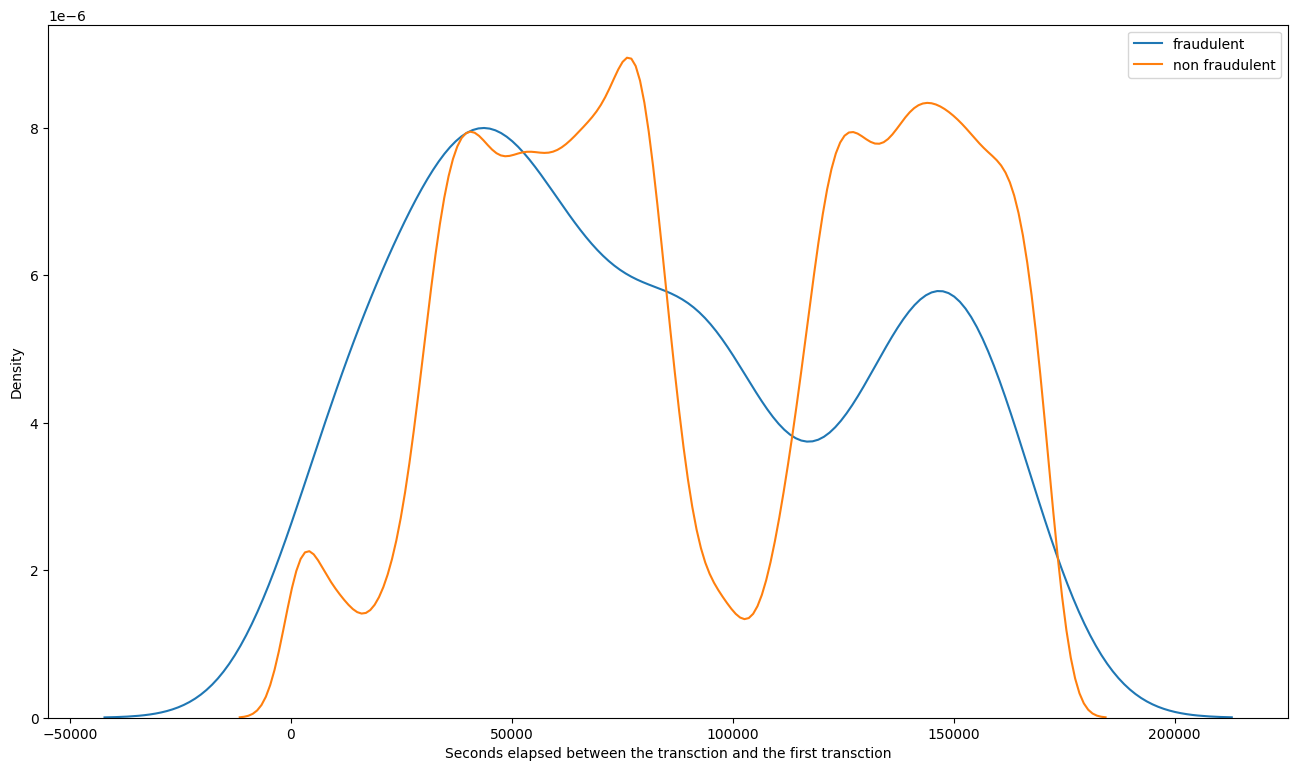

In [65]:
# Distribution plot
plt.figure(figsize=(16,9))
ax = sns.distplot(data_fraud['Time'], label='fraudulent', hist=False)
ax = sns.distplot(data_non_fraud['Time'], label='non fraudulent', hist=False)
ax.set(xlabel = 'Seconds elapsed between the transction and the first transction')
plt.legend()
plt.show();

**Observation:** We see no specific pattern for fraudulent transactions and non-fraudulent for 'Time'. 

### Train - Test Split

In [68]:
# Putting feature variables into X
X = df_unique.drop(['Class'], axis=1)

# Putting target variable to y
y = df_unique['Class']

In [69]:
# Import library
from sklearn.model_selection import train_test_split
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.8, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [70]:
X_train.shape, y_train.shape

((226971, 32), (226971,))

In [71]:
X_test.shape, y_test.shape

((56743, 32), (56743,))

### Feature Scaling
We need to scale the 'Amount' column because all the other columns have been PCA converted.

In [72]:
# Scale the 'Amount' column
scaler = StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [73]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Amount_Scaled,Amount_Category
217955,141107.0,0.871006,1.318798,-2.894956,0.039751,1.322494,-0.855594,-0.120716,-2.928866,-0.734330,...,0.491226,-0.024999,0.578421,0.619504,0.586328,-0.053281,0.149769,-0.373323,-0.373299,0-50
115040,73726.0,-1.490277,1.132335,0.560098,0.838959,0.290881,-0.209488,-0.413048,-1.193000,-0.959234,...,0.017185,-0.257169,0.036778,-0.218060,-0.318310,0.277994,-0.088479,-0.325043,-0.324993,0-50
241823,151204.0,1.766757,-0.074387,0.174380,3.542786,-0.125714,1.253379,-0.836521,0.425096,-0.264118,...,0.044837,0.157497,-1.110835,-0.462992,-0.132981,0.012896,-0.032239,-0.116814,-0.116652,50-100
42317,41052.0,-15.319964,-15.126137,-0.856656,3.192933,3.495020,-1.472074,1.447344,-1.839068,3.440986,...,1.141572,5.576888,0.003408,2.332782,1.099939,-2.814695,7.341635,0.220547,0.220891,100-150
162779,115361.0,-1.528011,-1.111644,0.706332,5.054037,-1.013562,2.544815,1.615224,0.087533,-0.881589,...,-0.020360,1.756065,0.207888,-1.108633,0.047967,0.558456,0.050635,1.958373,1.959653,500-1000


In [74]:
cols = X_train.columns
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Amount_Scaled', 'Amount_Category'],
      dtype='object')

In [81]:
#X_train = X_train.drop(['Amount_Scaled', 'Amount_Category'], axis=1)


KeyError: "['Amount_Scaled', 'Amount_Category'] not found in axis"

In [82]:
#X_test = X_test.drop(['Amount_Scaled', 'Amount_Category'], axis=1)

In [76]:
cols = X_train.columns
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

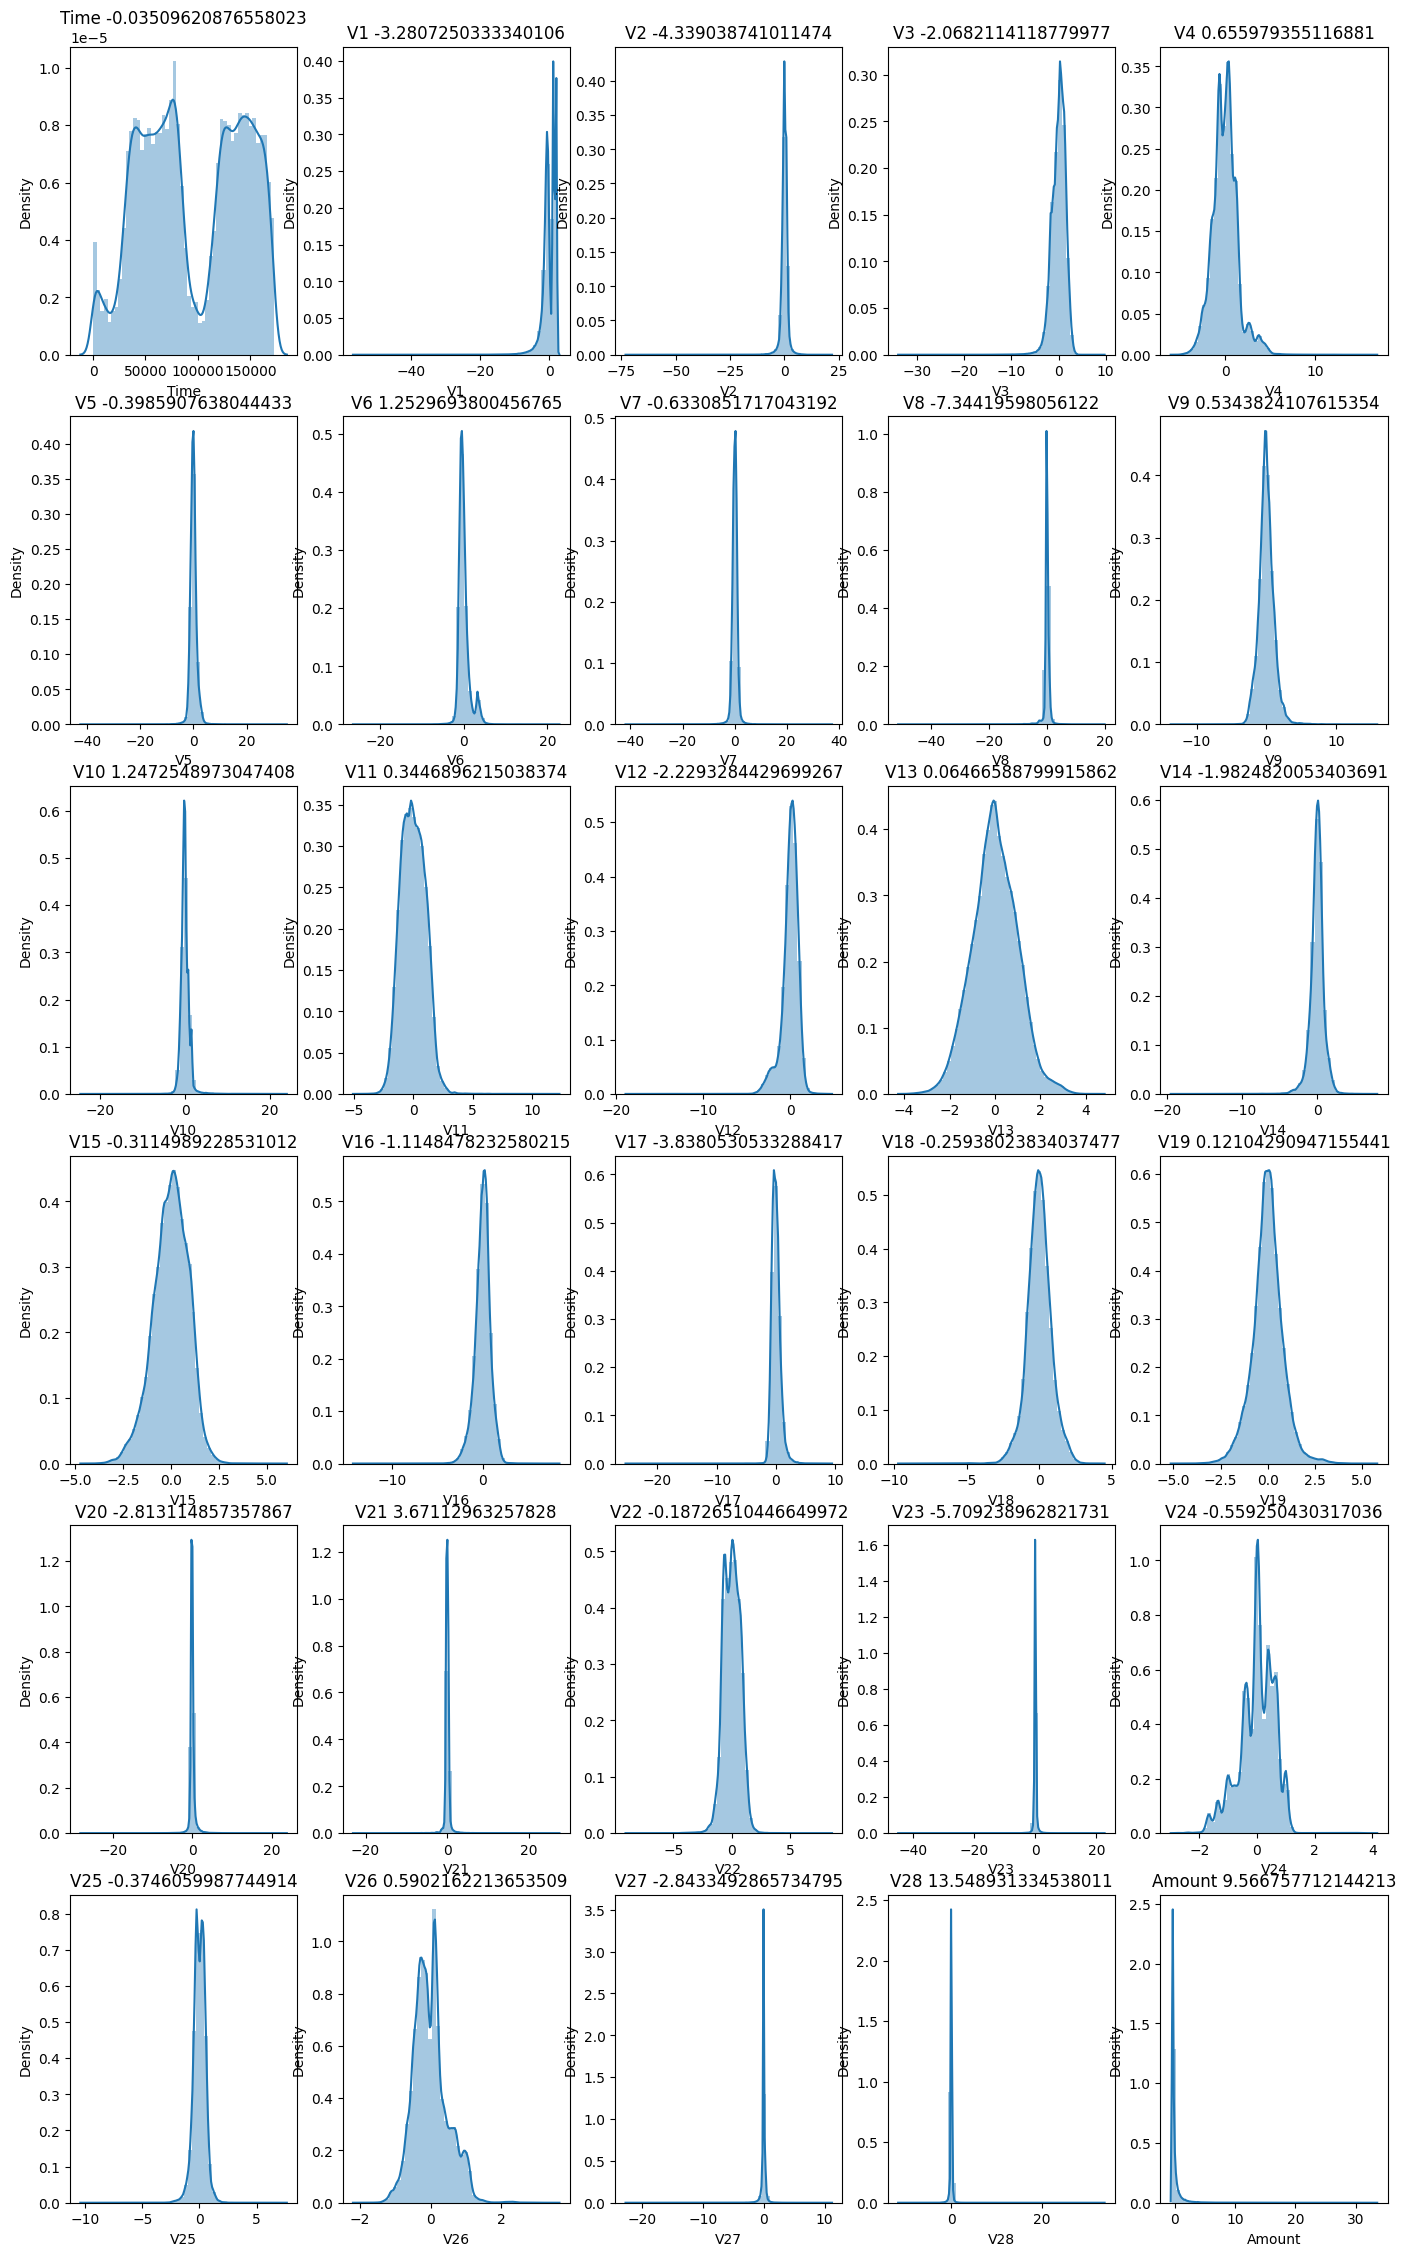

In [77]:
# Plotting the distribution of the variables (skewness) of all the columns
k = 0
plt.figure(figsize=(17,28))
for col in cols :    
    k = k + 1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

**Observation:** Looking at the graph, we see that there are many variables that are heavily skewed. Next, we'll minimize the bias for those variables to include them in the 'normal distribution'.

In [78]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [83]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

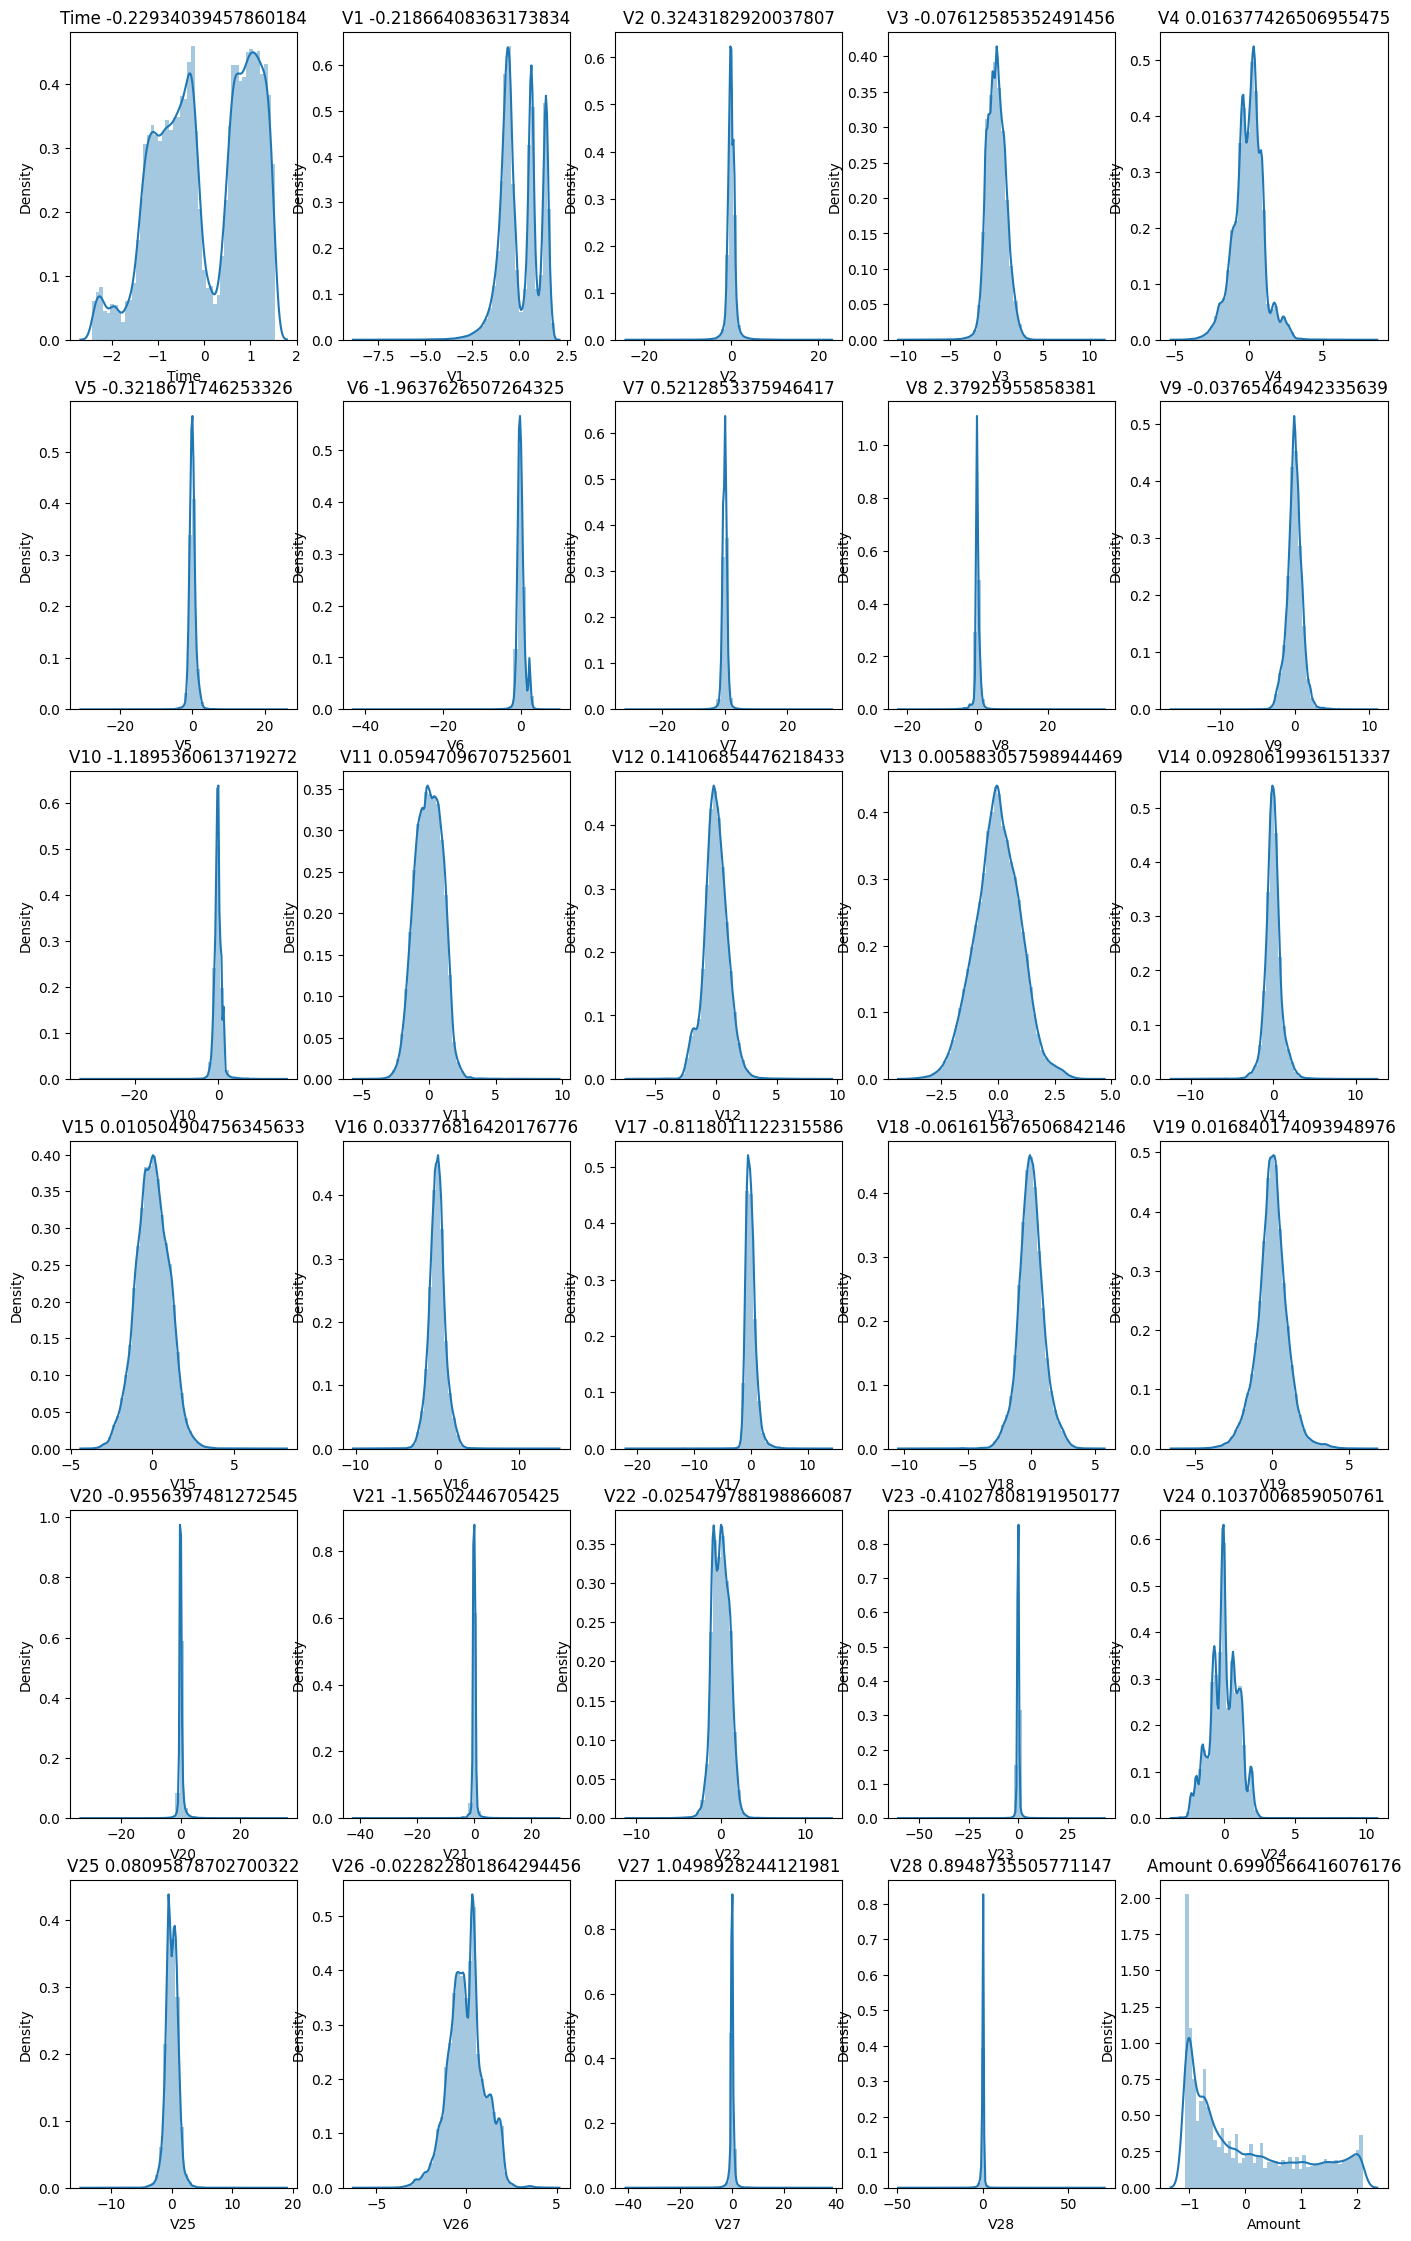

In [84]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

**Observation:** Now we can see that all variables have a normal distribution after the transformation.

### Model  Building (Under Sampling)

In [118]:
! pip install imbalanced-learn
# Importing undersampler library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [121]:
# instantiating the random undersampler 
random_undersampling = RandomUnderSampler()
# resampling X, y
X_train_random_undersample, y_train_random_undersample = random_undersampling.fit_resample(X_train, y_train)

In [117]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

In [96]:
def display_confusion_matrix_and_metrics(true_labels, predicted_labels):
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    
    # Visualization of the confusion matrix using a heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Oranges',
                xticklabels=['Non-Fraudulent','Fraudulent'], 
                yticklabels=['Non-Fraudulent','Fraudulent'])
    plt.title(f'Accuracy: {accuracy_score(true_labels, predicted_labels):.4f}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # Printing classification report for further insights
    print("\nClassification Report:")
    print(classification_report(true_labels, predicted_labels))

In [125]:
def plot_roc_auc_curve(true_labels, probabilities):
    
    # Calculate the ROC curve points
    false_positive_rate, true_positive_rate, _ = roc_curve(true_labels, probabilities)
    
    # Calculate the AUC score
    auc_score = roc_auc_score(true_labels, probabilities)
    
    # Plot the ROC curve
    plt.figure(figsize=(16, 9))
    plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline (No Skill)')
    plt.plot(false_positive_rate, true_positive_rate, marker='.', label=f'Model (AUC = {auc_score:.3f})')
    
    # Configure plot aesthetics
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve and AUC Score')
    plt.legend()
    plt.show()

**1. Logistic Regression**

In [126]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train_random_undersample, y_train_random_undersample)

# Predict on training and testing sets
train_predictions = logistic_model.predict(X_train_random_undersample)
test_predictions = logistic_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)

In [128]:
# Output model performance metrics
print(f'Recall Score: {recall_score(y_train_random_undersample, train_predictions):.4f}')
print(f'Precision Score: {precision_score(y_train_random_undersample, train_predictions):.4f}')
print(f'F1 Score: {f1_score(y_train_random_undersample, train_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_train_random_undersample, train_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_train_random_undersample, train_predictions):.4f}')

Recall Score: 0.9269
Precision Score: 0.9807
F1 Score: 0.9530
Accuracy Score: 0.9543
AUC Score: 0.9543


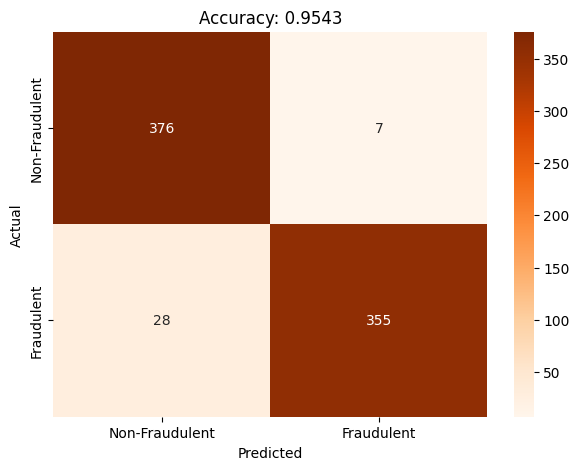


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       383
           1       0.98      0.93      0.95       383

    accuracy                           0.95       766
   macro avg       0.96      0.95      0.95       766
weighted avg       0.96      0.95      0.95       766



In [129]:
# Train Predictions
display_confusion_matrix_and_metrics(y_train_random_undersample, train_predictions)

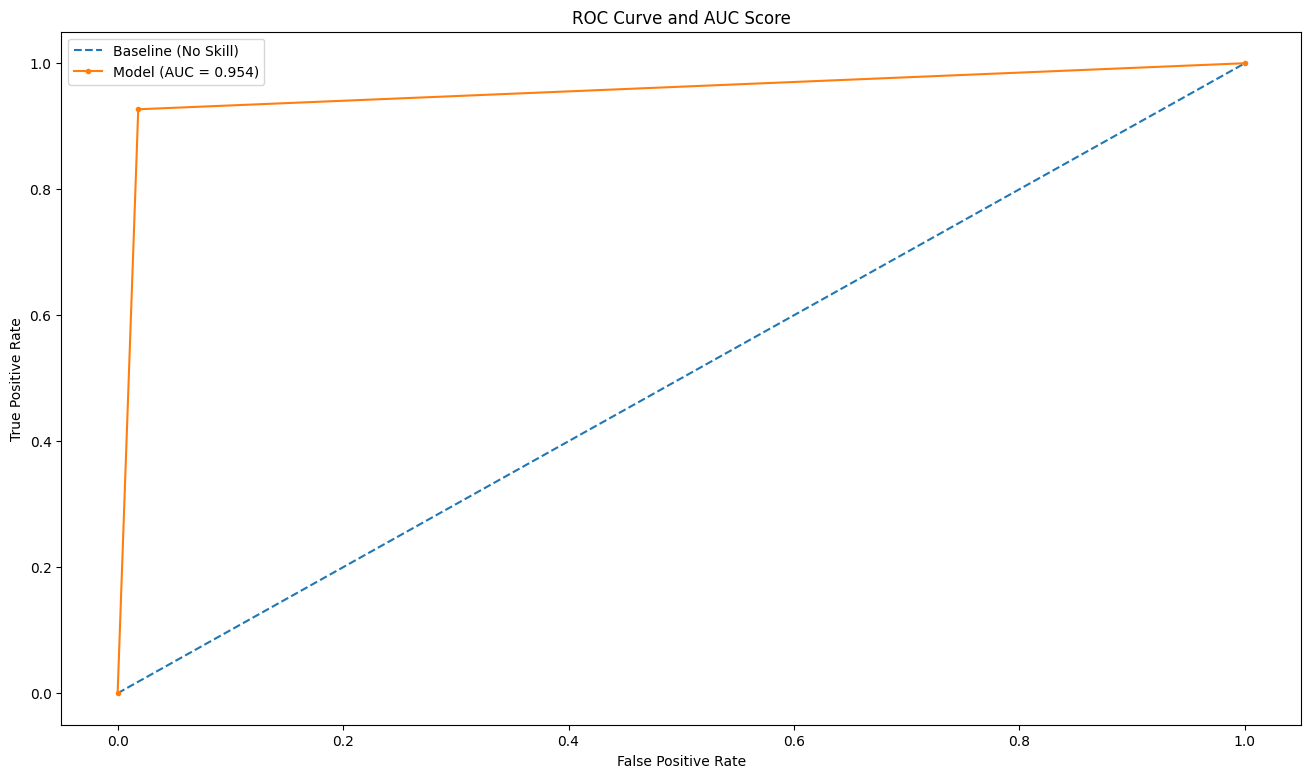

In [130]:
plot_roc_auc_curve(y_train_random_undersample, train_predictions)

Training Logistic Regression on Test Set

In [140]:
# Test Data Performance Metrics
print(f'Recall Score: {recall_score(y_test, test_predictions):.4f}')
print(f'Precision Score: {precision_score(y_test, test_predictions):.4f}')
print(f'F1 Score: {f1_score(y_test, test_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_test, test_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_test, test_predictions):.4f}')

Recall Score: 0.8222
Precision Score: 0.0354
F1 Score: 0.0678
Accuracy Score: 0.9641
AUC Score: 0.8933


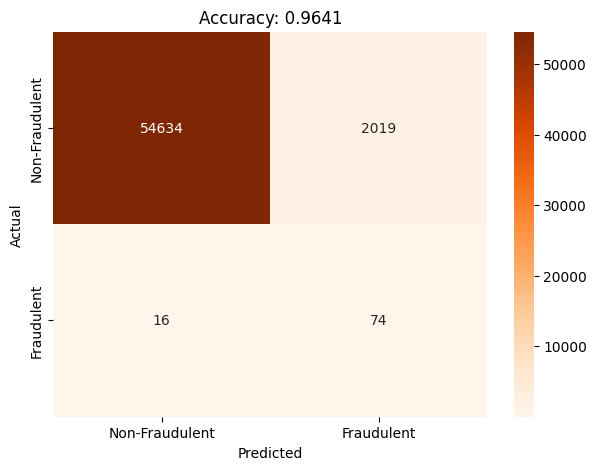


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56653
           1       0.04      0.82      0.07        90

    accuracy                           0.96     56743
   macro avg       0.52      0.89      0.52     56743
weighted avg       1.00      0.96      0.98     56743



In [141]:
# Test Data Predictions
display_confusion_matrix_and_metrics(y_test, test_predictions)

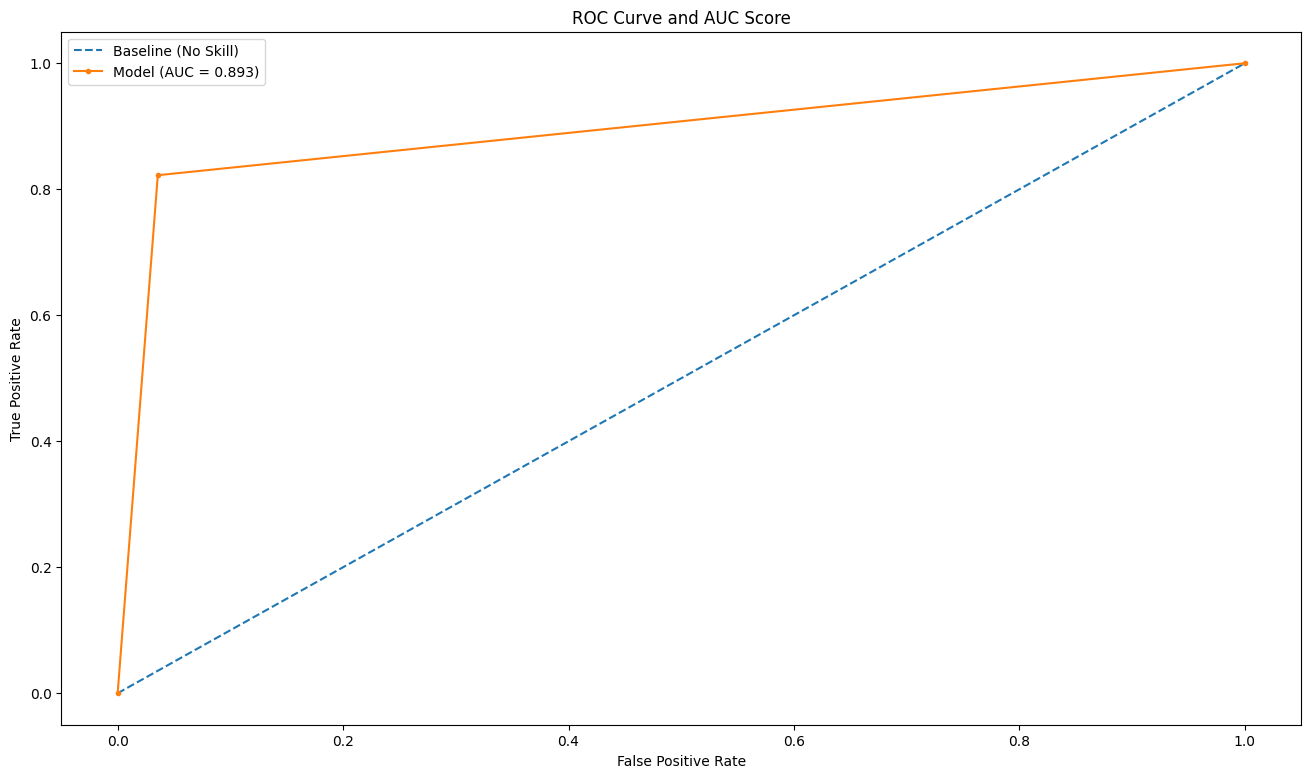

In [142]:
plot_roc_auc_curve(y_test, test_predictions)

**2. Naive Bayes**

In [135]:
from sklearn.naive_bayes import GaussianNB

gaussian_nb_model = GaussianNB()
gaussian_nb_model.fit(X_train_random_undersample, y_train_random_undersample)

# Make predictions using the trained model
train_predictions = gaussian_nb_model.predict(X_train_random_undersample)
test_predictions = gaussian_nb_model.predict(X_test)

# Evaluate the model's performance
test_accuracy = accuracy_score(y_test, test_predictions)



In [136]:
# Display evaluation metrics for the training dataset
print(f'Recall Score (Train): {recall_score(y_train_random_undersample, train_predictions):.4f}')
print(f'Precision Score (Train): {precision_score(y_train_random_undersample, train_predictions):.4f}')
print(f'F1-Score (Train): {f1_score(y_train_random_undersample, train_predictions):.4f}')
print(f'Accuracy Score (Train): {accuracy_score(y_train_random_undersample, train_predictions):.4f}')
print(f'AUC (Train): {roc_auc_score(y_train_random_undersample, train_predictions):.4f}')

Recall Score (Train): 0.8642
Precision Score (Train): 0.9678
F1-Score (Train): 0.9131
Accuracy Score (Train): 0.9178
AUC (Train): 0.9178


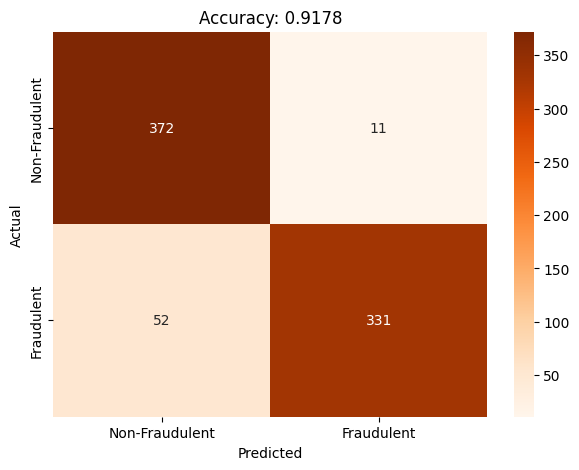


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       383
           1       0.97      0.86      0.91       383

    accuracy                           0.92       766
   macro avg       0.92      0.92      0.92       766
weighted avg       0.92      0.92      0.92       766



In [138]:
# Train Predictions
display_confusion_matrix_and_metrics(y_train_random_undersample, train_predictions)

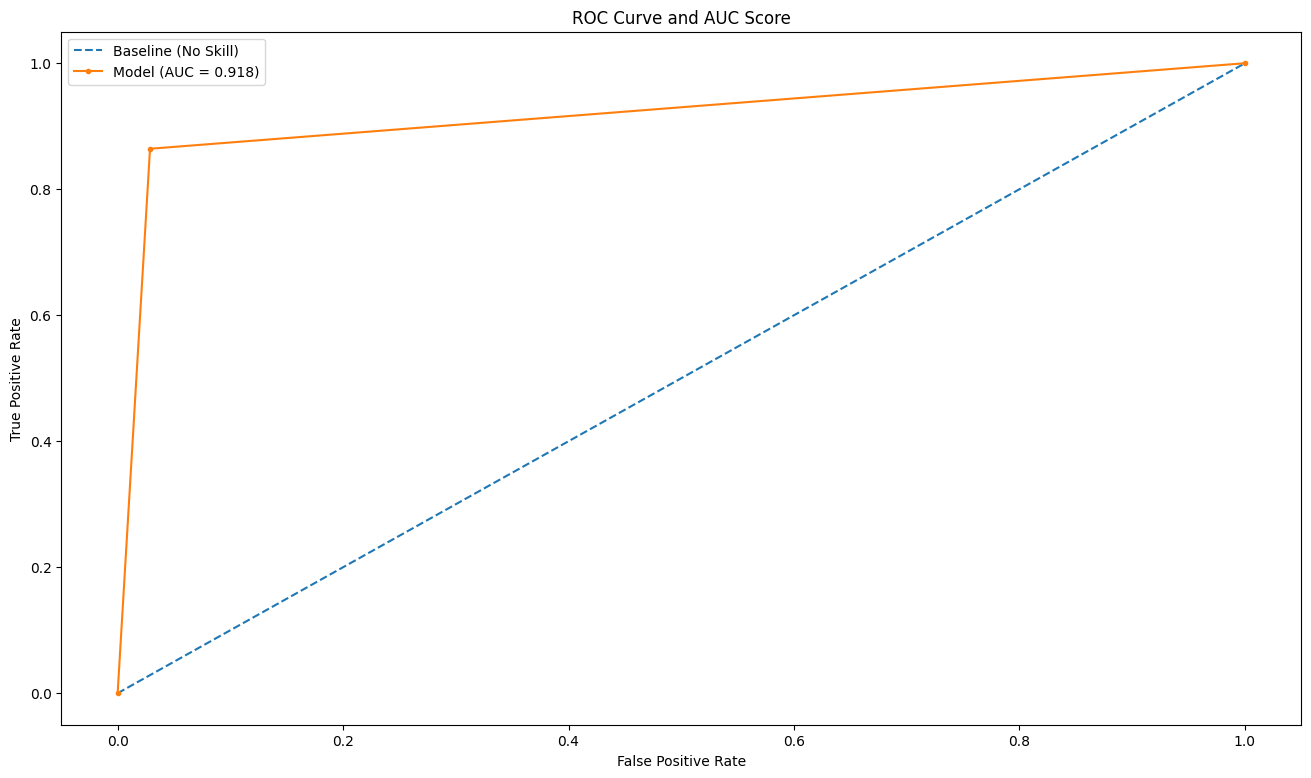

In [143]:
plot_roc_auc_curve(y_train_random_undersample, train_predictions)

Training Naive Bayes Model on Test Set

In [144]:
# Test Data Performance Metrics
print(f'Recall Score: {recall_score(y_test, test_predictions):.4f}')
print(f'Precision Score: {precision_score(y_test, test_predictions):.4f}')
print(f'F1 Score: {f1_score(y_test, test_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_test, test_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_test, test_predictions):.4f}')

Recall Score: 0.8222
Precision Score: 0.0354
F1 Score: 0.0678
Accuracy Score: 0.9641
AUC Score: 0.8933


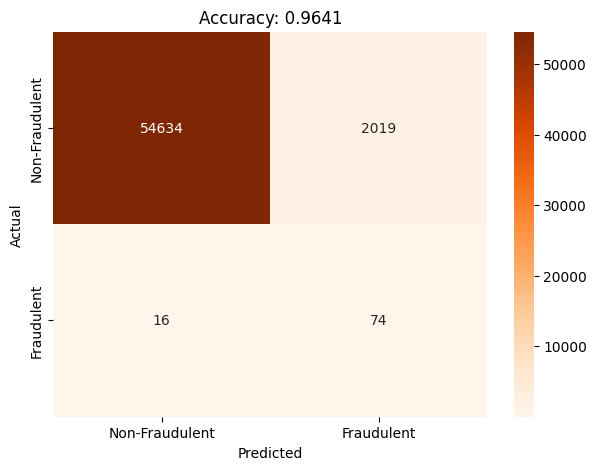


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56653
           1       0.04      0.82      0.07        90

    accuracy                           0.96     56743
   macro avg       0.52      0.89      0.52     56743
weighted avg       1.00      0.96      0.98     56743



In [147]:
# Test Data Predictions
display_confusion_matrix_and_metrics(y_test, test_predictions)

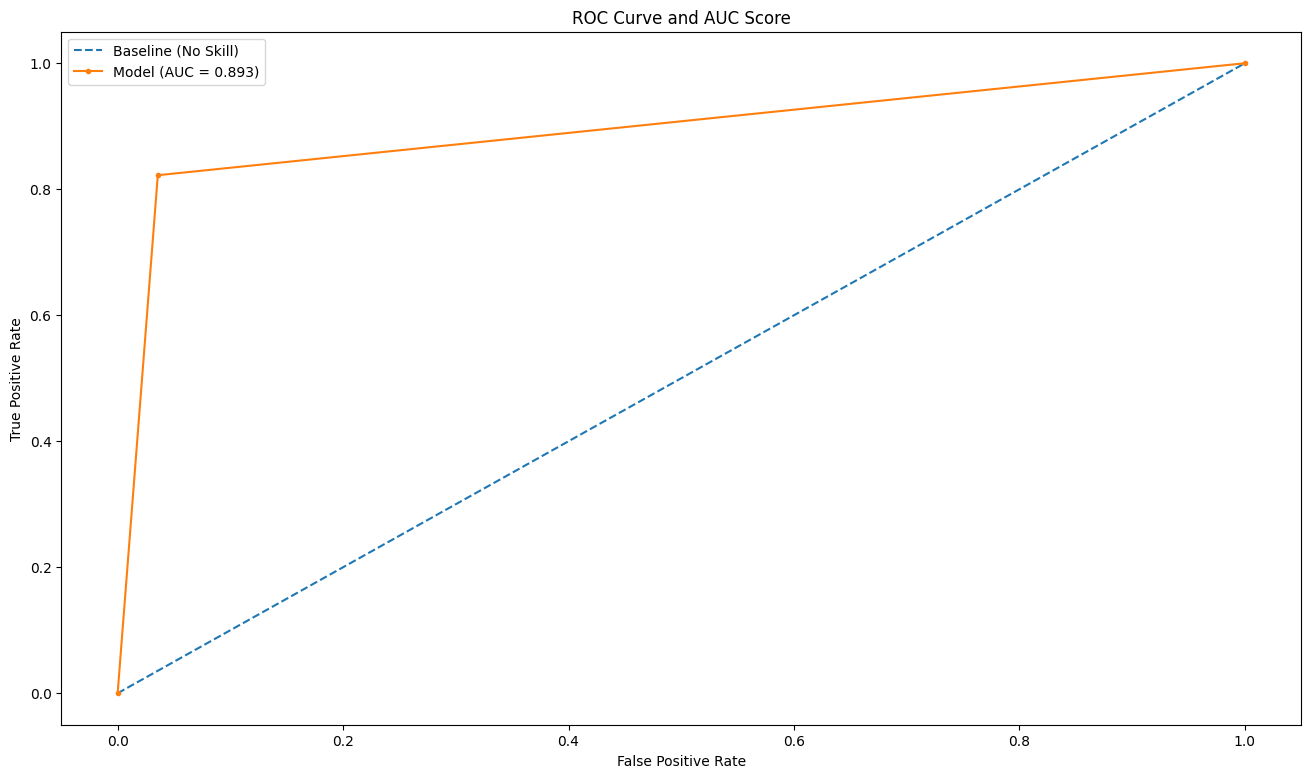

In [145]:
plot_roc_auc_curve(y_test, test_predictions)

### Model  Building (Over Sampling)

In [148]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler

In [149]:
# instantiating the random oversampler 
random_oversampling = RandomOverSampler()
# resampling X, y
X_train_random_oversample, y_train_randomoversample = random_oversampling.fit_resample(X_train, y_train)

In [150]:
# Befor sampling class distribution
print('Before sampling class distribution:', Counter(y_train))
# new class distribution
print('New class distribution:', Counter(y_train_randomoversample))

Before sampling class distribution: Counter({0: 226588, 1: 383})
New class distribution: Counter({0: 226588, 1: 226588})


**1. Logistic Regression**

In [151]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train_random_oversample, y_train_randomoversample)

# Predict on training and testing sets
train_predictions = logistic_model.predict(X_train_random_oversample)
test_predictions = logistic_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)

In [152]:
# Output model performance metrics
print(f'Recall Score: {recall_score(y_train_randomoversample, train_predictions):.4f}')
print(f'Precision Score: {precision_score(y_train_randomoversample, train_predictions):.4f}')
print(f'F1 Score: {f1_score(y_train_randomoversample, train_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_train_randomoversample, train_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_train_randomoversample, train_predictions):.4f}')

Recall Score: 0.9319
Precision Score: 0.9749
F1 Score: 0.9529
Accuracy Score: 0.9540
AUC Score: 0.9540


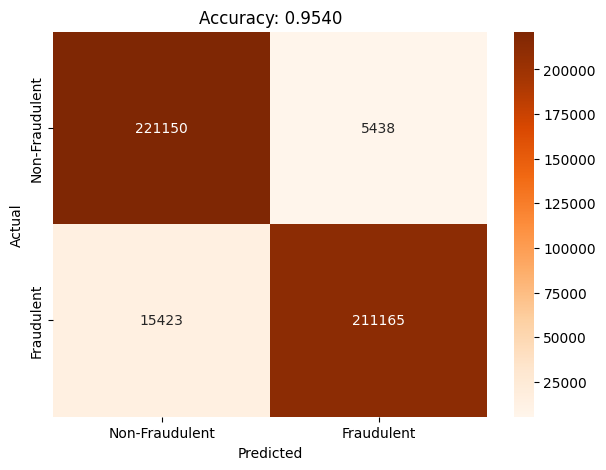


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95    226588
           1       0.97      0.93      0.95    226588

    accuracy                           0.95    453176
   macro avg       0.95      0.95      0.95    453176
weighted avg       0.95      0.95      0.95    453176



In [153]:
# Train Predictions
display_confusion_matrix_and_metrics(y_train_randomoversample, train_predictions)

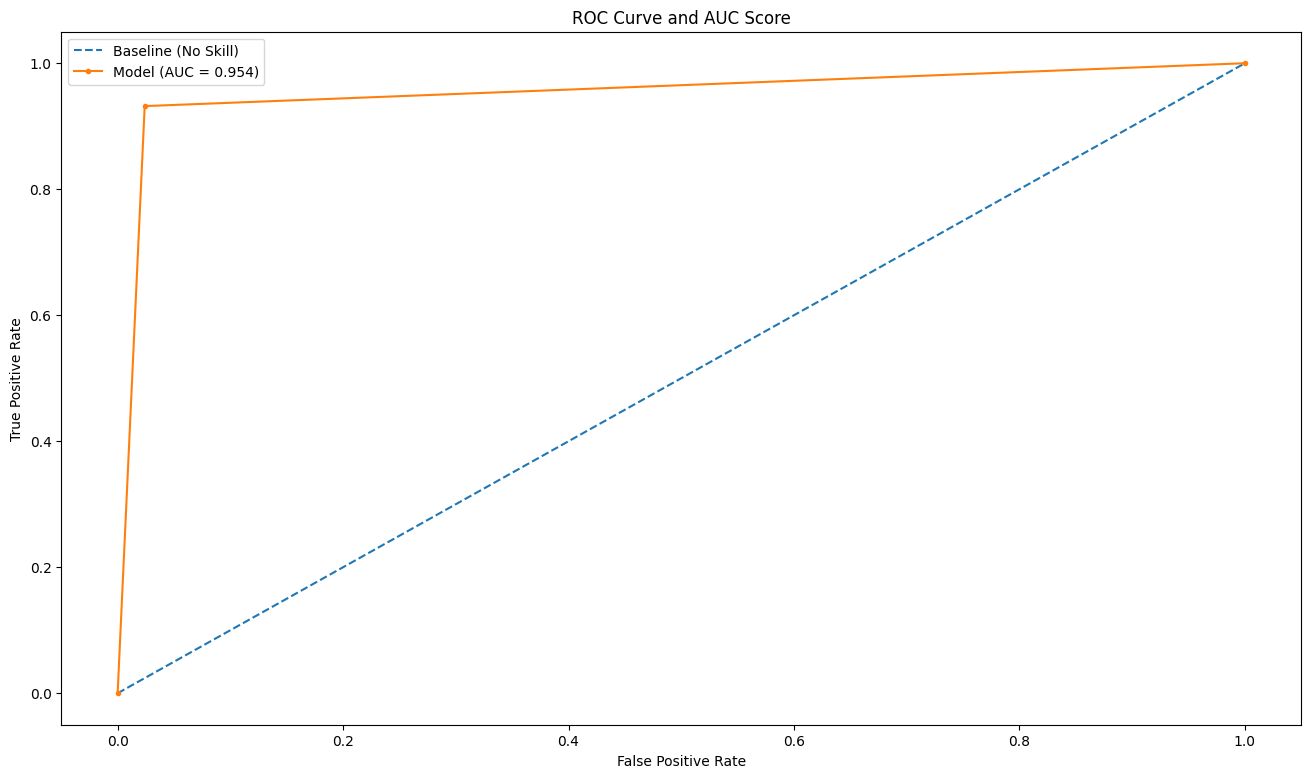

In [154]:
plot_roc_auc_curve(y_train_randomoversample, train_predictions)

Training Logistic Regression on Test Set

In [155]:
# Test Data Performance Metrics
print(f'Recall Score: {recall_score(y_test, test_predictions):.4f}')
print(f'Precision Score: {precision_score(y_test, test_predictions):.4f}')
print(f'F1 Score: {f1_score(y_test, test_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_test, test_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_test, test_predictions):.4f}')

Recall Score: 0.9000
Precision Score: 0.0416
F1 Score: 0.0795
Accuracy Score: 0.9670
AUC Score: 0.9335


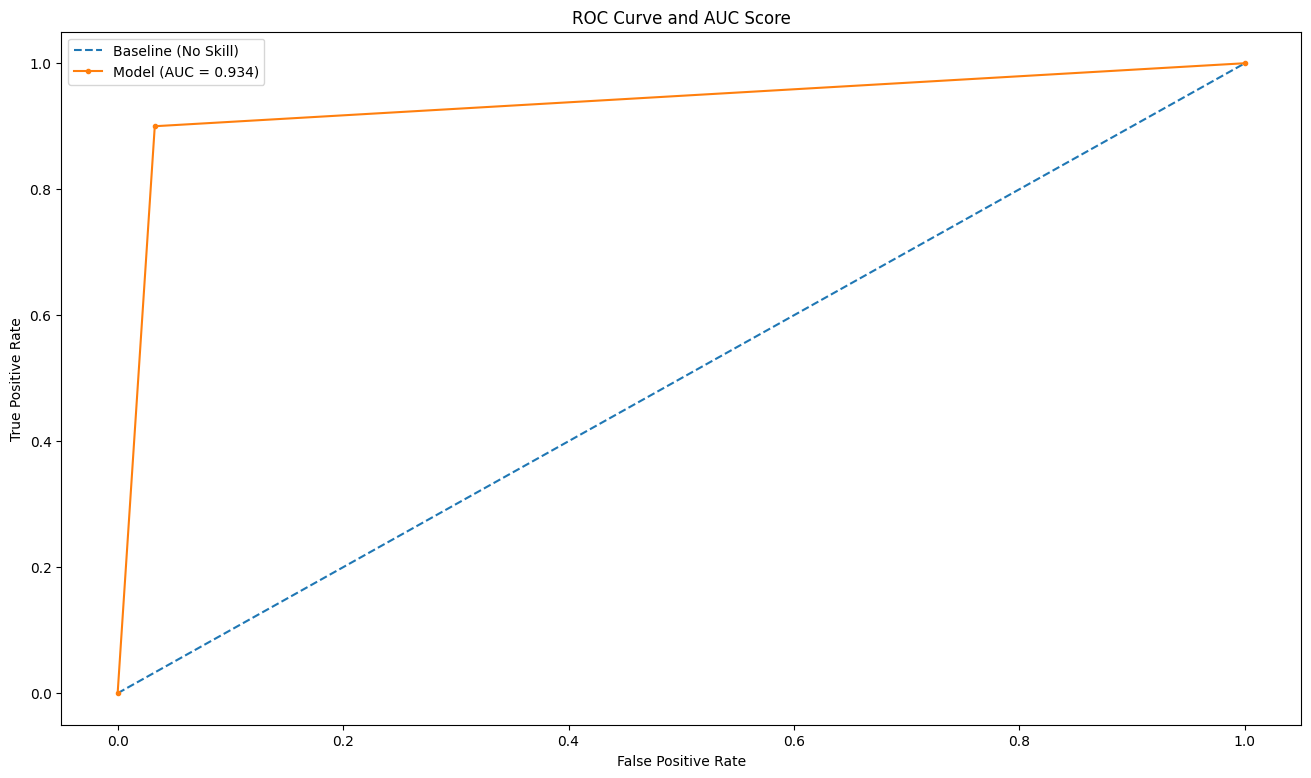

In [156]:
plot_roc_auc_curve(y_test, test_predictions)

**2. Naive Bayes**

In [157]:
gaussian_nb_model = GaussianNB()
gaussian_nb_model.fit(X_train_random_oversample, y_train_randomoversample)

# Make predictions using the trained model
train_predictions = gaussian_nb_model.predict(X_train_random_oversample)
test_predictions = gaussian_nb_model.predict(X_test)

# Evaluate the model's performance
test_accuracy = accuracy_score(y_test, test_predictions)


In [159]:
# Train Score
print('Recall score: %0.4f'% recall_score(y_train_randomoversample, train_predictions))
print('Precision score: %0.4f'% precision_score(y_train_randomoversample, train_predictions))
print('F1-Score: %0.4f'% f1_score(y_train_randomoversample, train_predictions))
print('Accuracy score: %0.4f'% accuracy_score(y_train_randomoversample, train_predictions))
print('AUC: %0.4f' % roc_auc_score(y_train_randomoversample, train_predictions))

Recall score: 0.8669
Precision score: 0.9702
F1-Score: 0.9156
Accuracy score: 0.9201
AUC: 0.9201


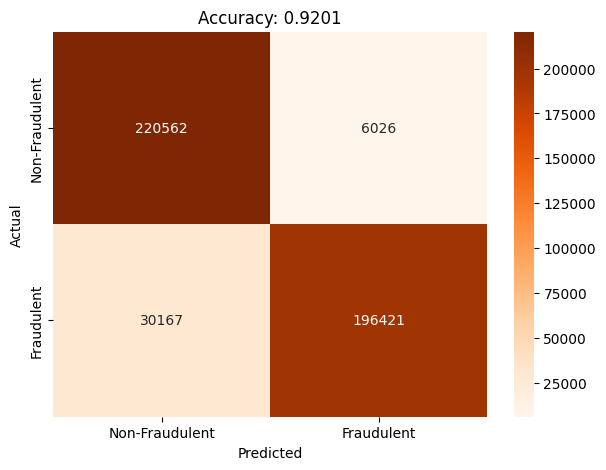


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92    226588
           1       0.97      0.87      0.92    226588

    accuracy                           0.92    453176
   macro avg       0.92      0.92      0.92    453176
weighted avg       0.92      0.92      0.92    453176



In [160]:
# Train Predictions
display_confusion_matrix_and_metrics(y_train_randomoversample, train_predictions)

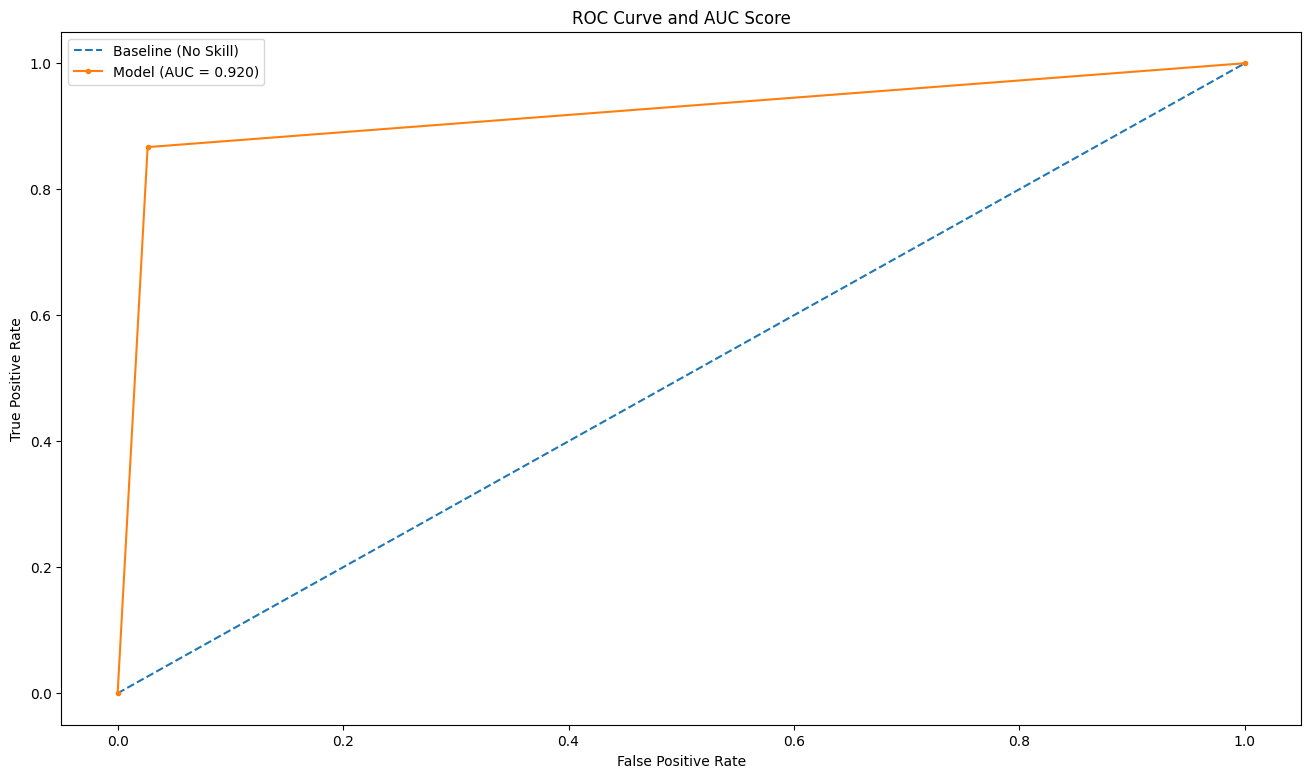

In [161]:
plot_roc_auc_curve(y_train_randomoversample, train_predictions)

Training Naive Bayes on test set

In [162]:
# Test Data Performance Metrics
print(f'Recall Score: {recall_score(y_test, test_predictions):.4f}')
print(f'Precision Score: {precision_score(y_test, test_predictions):.4f}')
print(f'F1 Score: {f1_score(y_test, test_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_test, test_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_test, test_predictions):.4f}')


Recall Score: 0.8111
Precision Score: 0.0444
F1 Score: 0.0842
Accuracy Score: 0.9720
AUC Score: 0.8917


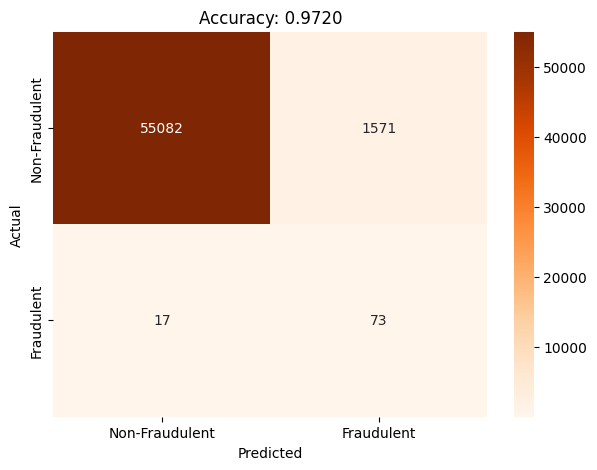


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56653
           1       0.04      0.81      0.08        90

    accuracy                           0.97     56743
   macro avg       0.52      0.89      0.53     56743
weighted avg       1.00      0.97      0.98     56743



In [163]:
# Test Data Predictions
display_confusion_matrix_and_metrics(y_test, test_predictions)


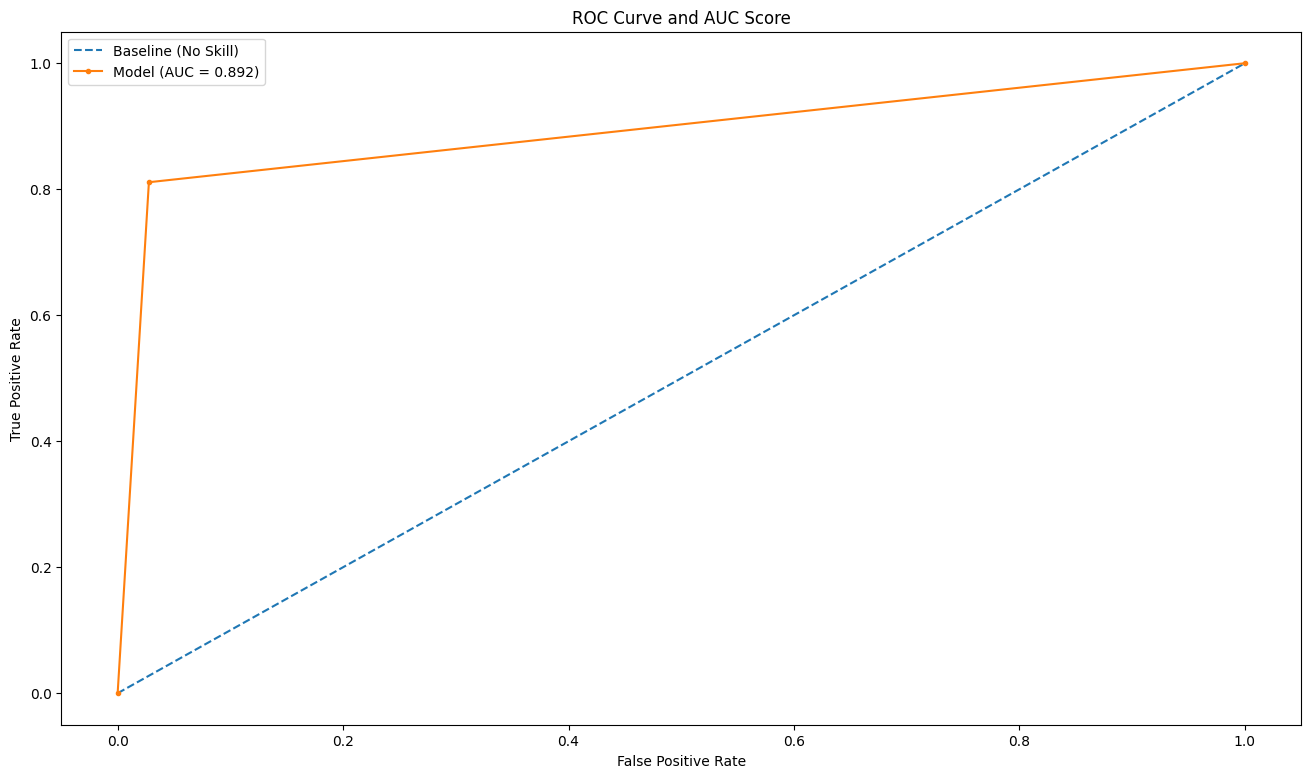

In [164]:
plot_roc_auc_curve(y_test, test_predictions)